***
## Table of Contents
<br>
<ol>
    <ol>
        <h2><a href='#1' style="text-decoration : none; color : #000000;"> 70:30 Uninfected:Infected Users</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. 80:20 Train Test Split </h3></a>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. 70:30 Train Test Split </h3></a>
            </ul>
        </ol>
<br>

In [1]:
### Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
pd.set_option("display.max_columns",40)
warnings.filterwarnings("ignore")

from IPython.display import HTML


import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,binarize
from pandas_ml import ConfusionMatrix

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

Using TensorFlow backend.


In [2]:
### Function get_params takes as input a grid search model and prints out the best parameters for the model and 
### prints the best accuracy of the model
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())

### The function takes as input the model, X and Y data to generate the confusion matrix  
def get_cm(model,a,b):
    y_pred=model.predict(a)
    cm=ConfusionMatrix(b,y_pred)
    display(cm)
    return cm
 
### The get accuracy plot takes as input a dataframe and a string for the title of the plot and displays a plot
### The function is primarily for plotting of accuracies for various classifiers for the same split.
def get_accuracy_plot(data,title=''):
    plt.figure(figsize=(12,8))
    plt.plot(data['accuracy'].values, '--o')
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Classifier', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    plt.xlim([0, 9])
    plt.title(title,size=18,y=1.05)
    plt.xticks(np.arange(10),data.index.get_values(),rotation=90)
    plt.legend(loc='upper right', fontsize=18)
    plt.show()

### Function grid takes as input an estimator, X_train,Y_Train,X_test and Y_test and a string represetning the name of the model
### We perform StratifiedKFold cross validation and grid search to hypertune the parameters of the model     
def grid_acc(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=params,scoring='accuracy',cv=kfold,n_jobs=24)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    acc_train=accuracy_score(y,grid_search.predict(x))
    print("Accuracy of the ",model_name," model for the training data is:",acc_train)
    print("\nConfusion Matrix for Training data is:")
    cm_train=get_cm(grid_search,x,y)
    acc_test=accuracy_score(y_test,grid_search.predict(x_test))
    print("Accuracy of the ",model_name," model for test data is:",acc_test)
    print("\nConfusion Matrix for test data is:")
    cm_test=get_cm(grid_search,x_test,y_test)
    return grid_search,cm_train,cm_test,acc_train,acc_test    

### Plot roc curve
def get_roc_curve(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy on test data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

def get_roc_curve_deep_learning(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy of Logistic Model on training data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

#### Function models

In [3]:
def feat_impt_plot(feat_impt):    
    data = [go.Bar(x=np.arange(0,13),y=feat_impt,text=np.round(feat_impt,2),
            textposition = 'outside',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6
        )]
    layout = go.Layout(
    xaxis=dict(title='Features',
        tickfont=dict(
            size=12,
            color='black'
        )),
    yaxis=dict(title='Feature Importances'))
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [4]:
def KNN_model(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'K-Nearest Neighbors' + '\033[0m')
    knn=KNeighborsClassifier()
    parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
    knn_model,cm_train,cm_test,acc_train,acc_test=grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")
    cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)
    knn=KNeighborsClassifier(**knn_model.best_params_)
    knn.fit(X_train,Y_train)
    return knn,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc

In [5]:
def Logistic_model(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'Logistic Regression' + '\033[0m')
    logistic=LogisticRegression()
    parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial'])
    log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")
    cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)
    logistic=LogisticRegression(**log_model.best_params_)
    return logistic,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc

In [6]:
def RandomForest(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'RandomForest Classifier' + '\033[0m')
    rf=RandomForestClassifier()
    parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
    rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")
    cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)
    rf=RandomForestClassifier(**rf_model.best_params_)
    rf.fit(X_train,Y_train)
    feat_impt_plot(rf.feature_importances_)
    return rf,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,rf.feature_importances_

In [7]:
def AdaBoost(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'Adaoost Classifier' + '\033[0m')
    ada=AdaBoostClassifier()
    parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
    ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")
    cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)
    ada=AdaBoostClassifier(**ada_model.best_params_)
    ada.fit(X_train,Y_train)
    feat_impt_plot(ada.feature_importances_)
    return ada,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,ada.feature_importances_

In [8]:
def GradientBoosting(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'GradientBoosting Classifier' + '\033[0m')
    gbc=GradientBoostingClassifier()
    parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
    gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")
    cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)
    gbc_model=GradientBoostingClassifier(**gbc_model.best_params_)
    gbc_model.fit(X_train,Y_train)
    feat_impt_plot(gbc_model.feature_importances_)
    return gbc_model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,gbc_model.feature_importances_

In [9]:
def ExtraTree(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'ExtraTree Classifier' + '\033[0m')
    ext_tree=ExtraTreeClassifier()
    parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
    ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")
    cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)
    ext_tree_model=ExtraTreeClassifier(**ext_tree_model.best_params_)
    ext_tree_model.fit(X_train,Y_train)
    feat_impt_plot(ext_tree_model.feature_importances_)
    return ext_tree_model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,ext_tree_model.feature_importances_

In [10]:
def Bagging(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'Bagging Classifier' + '\033[0m')
    bagging=BaggingClassifier()
    parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )
    bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")
    cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)
    bagging=BaggingClassifier(**bagging_model.best_params_)
    bagging.fit(X_train,Y_train)
    return bagging,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc

In [11]:
# def Voting(models,X_train,Y_train,X_test,Y_test):
#     print('\033[1m' + 'Voting Classifier' + '\033[0m')
#     eclf = VotingClassifier(estimators=[models], voting='soft')
#     eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
#     acc_train=eclf.score(X_train,Y_train)
#     print("The training accuracy is :",acc_train)
#     pred=eclf.predict(X_test)
#     cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
#     acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
#     print("The test accuracy is:",acc_test)
#     cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
#     display(cm_test)
#     cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)
#     return cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc

In [12]:
def DeepLearning1(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'Neural Network-1' + '\033[0m')
    np.random.seed(0)
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)
    acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
    print("The accuracy of the model on training data is:",acc_train)
    cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
    cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
    display(cm_train)
    acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
    print("The accuracy of the model on test data is:",acc_test)
    display(cm_test)
    cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)
    return  deep_learning,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc

In [13]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning

In [14]:
def DeepLearning2(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'Neural Network-2' + '\033[0m')
    classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
    grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
    grid_search.fit(X_train,Y_train)
    acc_train=grid_search.score(X_train,Y_train)
    print("The accuracy of the model on training data is:",acc_train)
    cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
    display(cm_train)
    acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
    print("The accuracy of the model on test data is:",acc_test)
    cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
    display(cm_test)
    cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)
    return grid_search,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc

In [15]:
ind_columns=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier',
                            'Neural Network-1','Neural-Network-2']

f=[KNN_model,Logistic_model,RandomForest,AdaBoost,GradientBoosting, ExtraTree,Bagging,DeepLearning1,DeepLearning2]

###  <a id='1.A' style="text-decoration : none; color : #000000;">A. 80:20 Train Test Split</a>

#### Random State 0

In [16]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_0.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))
Y=Y.values

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)


The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,BYR,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dcafa2634bb293a127a,4568,42,49,57,1200,5038,146.820762,56.766574,78.731441,5765.397777,184063.583962,578,185,138,268,205,180,149,136,156,104,120,158,254,116,207,118,134,215,177,142,343,221,295,439
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d8142614e2006d9d3c,16,4,6,5,7,16,5.937500,9.375000,34.125000,1506.000000,3370.125000,0,0,0,0,0,0,0,0,0,0,2,3,2,0,0,0,7,0,2,0,0,0,0,0


1 -> Infected
0 -> Uninfected


User
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dcafa2634bb293a127a    1
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d8142614e2006d9d3c    0
d348da18a4a8399e475122a0c73774f25fc9e7a1e047cf13843f8937afc814cc    0
ebf7553759a0cdbba0add7b038d6fab41a22dead2830bb0c35b18bfab37a2218    0
edec2b03986c67647a3e7b653f30189e134e546ae0da8b2a8e77660c60bbef5a    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.9395643131079252
The train/test split ratio is 80:20


In [17]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

K-Nearest Neighbors
Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,manhattan,50,distance


Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5451     0     5451
True           0  2309     2309
__all__     5451  2309     7760

Accuracy of the  KNN  model for test data is: 0.7963917525773195

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1200   139     1339
True         256   345      601
__all__     1456   484     1940

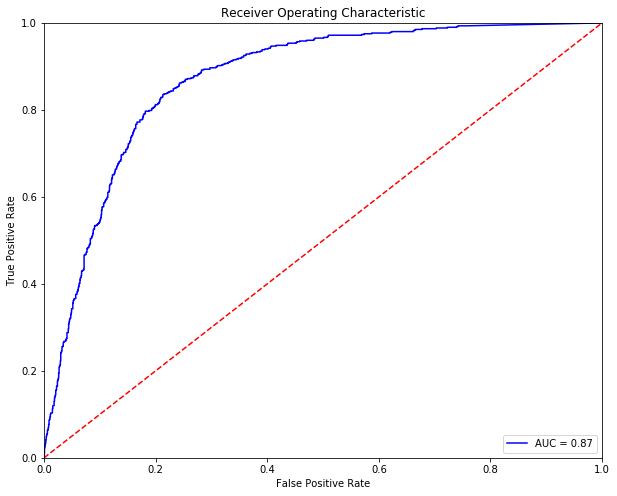

Optimal Threshold is 0.29047130185945397
Accuracy on test data is: 0.804639175257732


Predicted  False  True  __all__
Actual                         
False       1078   261     1339
True         118   483      601
__all__     1196   744     1940



Logistic Regression
Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.7,False,False,0.5,50,multinomial,l2,newton-cg,1e-05


Accuracy of the  Logistic  model for the training data is: 0.8027061855670103

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4493   958     5451
True         573  1736     2309
__all__     5066  2694     7760

Accuracy of the  Logistic  model for test data is: 0.818041237113402

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1123   216     1339
True         137   464      601
__all__     1260   680     1940

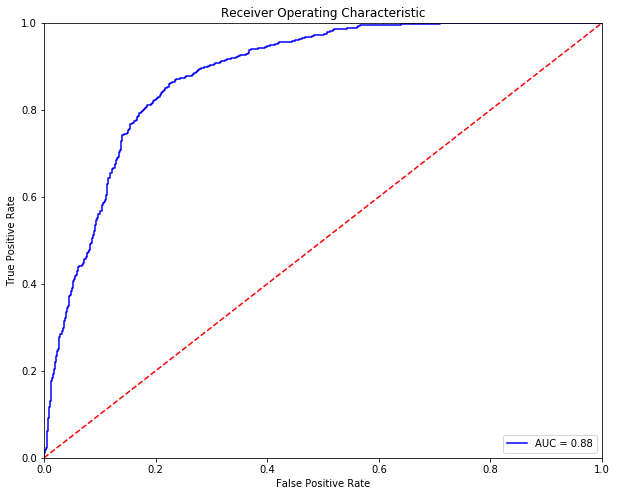

Optimal Threshold is 0.4676368518820543
Accuracy on test data is: 0.811340206185567


Predicted  False  True  __all__
Actual                         
False       1087   252     1339
True         114   487      601
__all__     1201   739     1940



RandomForest Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7,8,9,10,11
index,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,oob_score,random_state,verbose
0,gini,10,auto,10,0.1,10,10,0.1,200,False,0,0


Accuracy of the  Random Forest Trees  model for the training data is: 0.7024484536082474

Confusion Matrix for Training data is:


Predicted     0  1  __all__
Actual                     
0          5451  0     5451
1          2309  0     2309
__all__    7760  0     7760

Accuracy of the  Random Forest Trees  model for test data is: 0.6902061855670103

Confusion Matrix for test data is:


Predicted     0  1  __all__
Actual                     
0          1339  0     1339
1           601  0      601
__all__    1940  0     1940

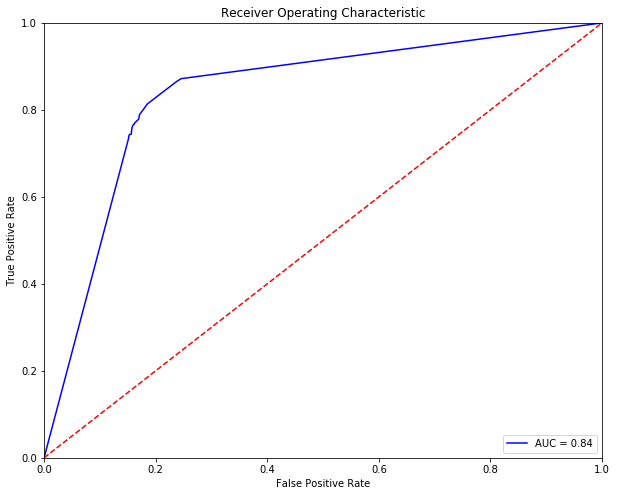

Optimal Threshold is 0.3050864201038303
Accuracy on test data is: 0.8164948453608247


Predicted  False  True  __all__
Actual                         
False       1109   230     1339
True         126   475      601
__all__     1235   705     1940

5451
0
0
5451
2309
0
0
2309
1.0
0.0
0.0
1.0
1339
0
0
1339
601
0
0
601
1.0
0.0
0.0
1.0


Adaoost Classifier
Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME,1.5,150,0


Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8157216494845361

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4774   677     5451
True         753  1556     2309
__all__     5527  2233     7760

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8097938144329897

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1174   165     1339
True         204   397      601
__all__     1378   562     1940

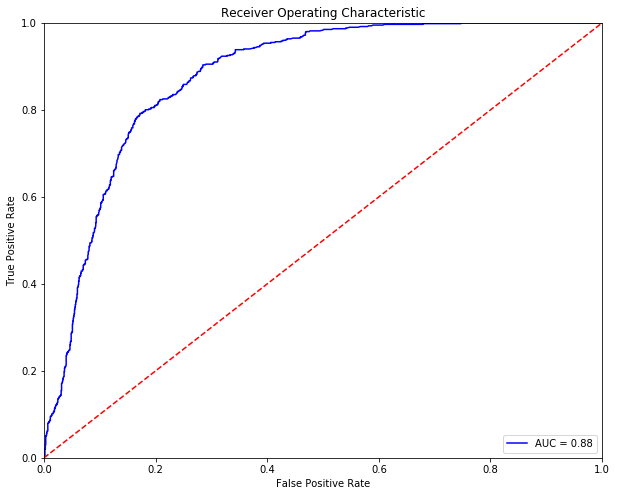

Optimal Threshold is 0.49195495681170903
Accuracy on test data is: 0.8067010309278351


Predicted  False  True  __all__
Actual                         
False       1081   258     1339
True         117   484      601
__all__     1198   742     1940



GradientBoosting Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state,subsample
0,mse,0.05,deviance,10,0.3,150,0,0.5


Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8128865979381443

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4732   719     5451
True         733  1576     2309
__all__     5465  2295     7760

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8103092783505155

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1165   174     1339
True         194   407      601
__all__     1359   581     1940

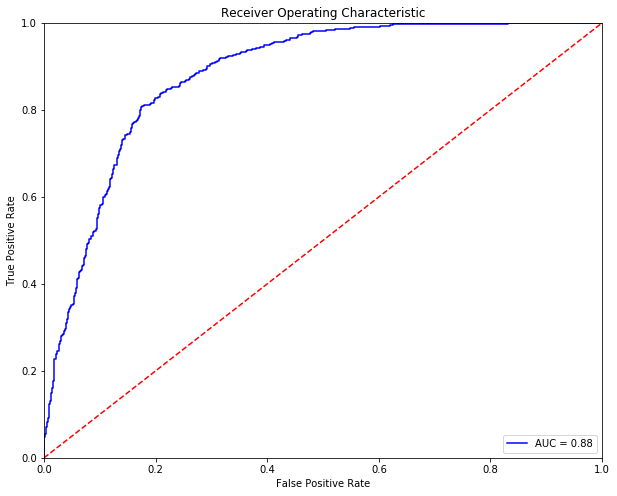

Optimal Threshold is 0.32228094052479617
Accuracy on test data is: 0.8118556701030928


Predicted  False  True  __all__
Actual                         
False       1087   252     1339
True         113   488      601
__all__     1200   740     1940



ExtraTree Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,gini,10,auto,0.001,2,2,0,best


Accuracy of the  Extra Decision Tree  model for the training data is: 0.8051546391752578

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4513   938     5451
True         574  1735     2309
__all__     5087  2673     7760

Accuracy of the  Extra Decision Tree  model for test data is: 0.8144329896907216

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1120   219     1339
True         141   460      601
__all__     1261   679     1940

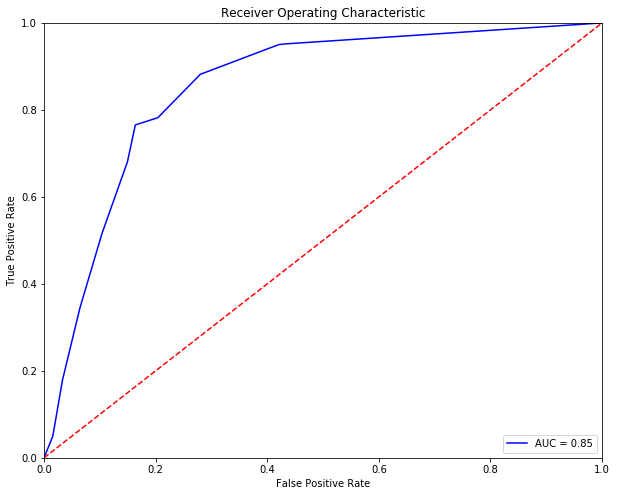

Optimal Threshold is 0.3355048859934853
Accuracy on test data is: 0.8144329896907216


Predicted  False  True  __all__
Actual                         
False       1120   219     1339
True         141   460      601
__all__     1261   679     1940



Bagging Classifier
Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.4,0.3,200,True,0


Accuracy of the  Bagging  model for the training data is: 0.9380154639175258

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5337   114     5451
True         367  1942     2309
__all__     5704  2056     7760

Accuracy of the  Bagging  model for test data is: 0.8077319587628866

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1188   151     1339
True         222   379      601
__all__     1410   530     1940

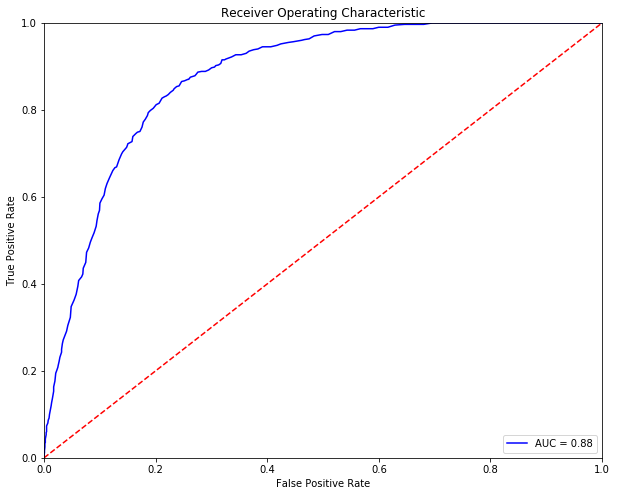

Optimal Threshold is 0.39
Accuracy on test data is: 0.8061855670103093


Predicted  False  True  __all__
Actual                         
False       1084   255     1339
True         121   480      601
__all__     1205   735     1940



Neural Network-1
The accuracy of the model on training data is: 0.8664948453608248


Predicted  False  True  __all__
Actual                         
False       5144   307     5451
True         729  1580     2309
__all__     5873  1887     7760

The accuracy of the model on test data is: 0.7711340206185567


Predicted  False  True  __all__
Actual                         
False       1183   156     1339
True         288   313      601
__all__     1471   469     1940

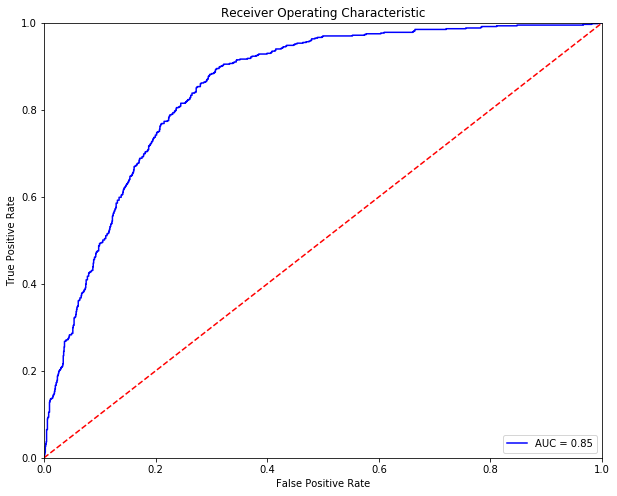

Optimal Threshold is 0.2591683
Accuracy of Logistic Model on training data is: 0.7768041237113402


Predicted  False  True  __all__
Actual                         
False       1041   298     1339
True         135   466      601
__all__     1176   764     1940



Neural Network-2
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.2min finished


The accuracy of the model on training data is: 0.809020618556701


Predicted  False  True  __all__
Actual                         
False       4585   866     5451
True         616  1693     2309
__all__     5201  2559     7760

The accuracy of the model on test data is: 0.8170103092783505


Predicted  False  True  __all__
Actual                         
False       1146   193     1339
True         162   439      601
__all__     1308   632     1940

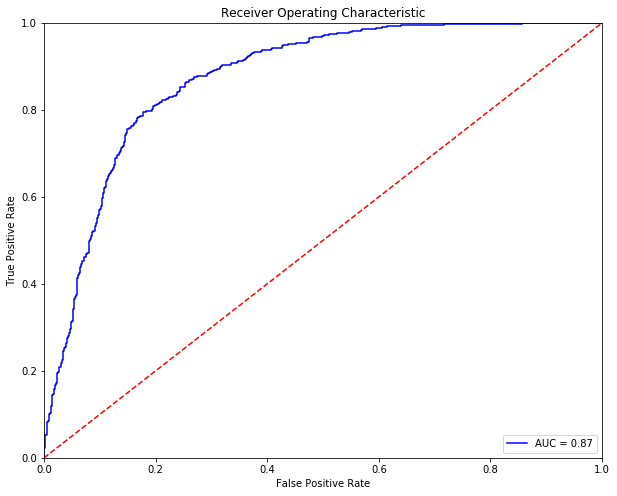

Optimal Threshold is 0.40399277
Accuracy on test data is: 0.8051546391752578


Predicted  False  True  __all__
Actual                         
False       1078   261     1339
True         117   484      601
__all__     1195   745     1940

In [18]:
feat_imp=[None]*4
j=0
for i in range(0,9):
    if i>=2 and i<=5:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,feat_imp[j]=f[i](X_train,Y_train,X_test,Y_test)
        j=j+1
    else:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc=f[i](X_train,Y_train,X_test,Y_test)
    table_80_50_train.loc[i]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
    table_80_50_test.loc[i] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
    table_80_50_test_roc.loc[i]=([accuracy, cm.TP,  cm.TN,   cm.FP, cm.FN,  cm.FPR, cm.FNR, threshold,roc_auc])
    print("\n")

In [19]:
table_80_50_train['index']=ind_columns
table_80_50_test['index']=ind_columns
table_80_50_test_roc['index']=ind_columns

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)
table_80_50_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_test_roc)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,1.000000,2309.000000,5451.000000,0.000000,0.000000,0.000000,0.000000
LogisticRegression,0.802706,1736.000000,4493.000000,958.000000,573.000000,0.175748,0.248159
RandomForestClassifier,0.702448,3829.046521,1621.953479,1621.953479,687.046521,0.702448,0.297552
AdaBoostClassifier,0.815722,1556.000000,4774.000000,677.000000,753.000000,0.124197,0.326115
GradientBoostingClassifier,0.812887,1576.000000,4732.000000,719.000000,733.000000,0.131902,0.317453
ExtraTreeClassifier,0.805155,1735.000000,4513.000000,938.000000,574.000000,0.172079,0.248592
BaggingClassifier,0.938015,1942.000000,5337.000000,114.000000,367.000000,0.020914,0.158943
Neural Network-1,0.866495,1580.000000,5144.000000,307.000000,729.000000,0.056320,0.315721
Neural-Network-2,0.809021,1693.000000,4585.000000,866.000000,616.000000,0.158870,0.266782


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.796392,345.000000,1200.000000,139.000000,256.000000,0.103809,0.425957
LogisticRegression,0.818041,464.000000,1123.000000,216.000000,137.000000,0.161314,0.227953
RandomForestClassifier,0.690206,924.186082,414.813918,414.813918,186.186082,0.690206,0.309794
AdaBoostClassifier,0.809794,397.000000,1174.000000,165.000000,204.000000,0.123226,0.339434
GradientBoostingClassifier,0.810309,407.000000,1165.000000,174.000000,194.000000,0.129948,0.322795
ExtraTreeClassifier,0.814433,460.000000,1120.000000,219.000000,141.000000,0.163555,0.234609
BaggingClassifier,0.807732,379.000000,1188.000000,151.000000,222.000000,0.112771,0.369384
Neural Network-1,0.771134,313.000000,1183.000000,156.000000,288.000000,0.116505,0.479201
Neural-Network-2,0.817010,439.000000,1146.000000,193.000000,162.000000,0.144137,0.269551


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,TP,TN,FP,FN,FPR,FNR,threshold,auc
index,,,,,,,,,
KNeighborsClassifier,0.804639,483.0,1078.0,261.0,118.0,0.194922,0.196339,0.290471,0.870385
LogisticRegression,0.811340,487.0,1087.0,252.0,114.0,0.188200,0.189684,0.467637,0.882121
RandomForestClassifier,0.816495,475.0,1109.0,230.0,126.0,0.171770,0.209651,0.305086,0.838947
AdaBoostClassifier,0.806701,484.0,1081.0,258.0,117.0,0.192681,0.194676,0.491955,0.876544
GradientBoostingClassifier,0.811856,488.0,1087.0,252.0,113.0,0.188200,0.188020,0.322281,0.881473
ExtraTreeClassifier,0.814433,460.0,1120.0,219.0,141.0,0.163555,0.234609,0.335505,0.853516
BaggingClassifier,0.806186,480.0,1084.0,255.0,121.0,0.190441,0.201331,0.390000,0.876312
Neural Network-1,0.776804,466.0,1041.0,298.0,135.0,0.222554,0.224626,0.259168,0.852157
Neural-Network-2,0.805155,484.0,1078.0,261.0,117.0,0.194922,0.194676,0.403993,0.873858


#### Random State 10

In [20]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_10.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))
Y=Y.values

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,BYR,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c420a510d83a4c8d5e70f0fa79b896008585c400807126e0dd367ef0eecebeb6,80,8,12,4,37,83,302.084337,170.180723,63.951807,15306.156627,407432.662651,4,0,1,7,1,2,1,0,0,7,12,5,6,0,6,0,1,3,6,5,3,2,11,0
059e225e600d51b34c32768dc16436d7ad6965e7428e90584c9fb25b9825bc68,548,8,19,8,205,554,510.418773,159.868231,45.395307,13566.797834,655119.371841,0,0,0,0,0,0,0,0,0,0,0,105,10,253,116,23,3,9,32,3,0,0,0,0


1 -> Infected
0 -> Uninfected


User
c420a510d83a4c8d5e70f0fa79b896008585c400807126e0dd367ef0eecebeb6    0
059e225e600d51b34c32768dc16436d7ad6965e7428e90584c9fb25b9825bc68    0
b384a39ab44eec7cfd2e093a0daa02cb8a31a5de2074be25a8cb7080b7bc2b4b    1
60a7e83d06013e0ecddb5488d101b31bdc44a0738f64667b46945011e3061980    0
d4ef6b0efdda4db1f34072faa7922be1c6d401feff238cbd5537ac6d707ac431    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.9379851197355754
The train/test split ratio is 80:20


In [21]:
## Table to store training and test measures
table_80_50_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

K-Nearest Neighbors
Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,euclidean,50,distance


Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5429     0     5429
True           0  2331     2331
__all__     5429  2331     7760

Accuracy of the  KNN  model for test data is: 0.8020618556701031

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1209   152     1361
True         232   347      579
__all__     1441   499     1940

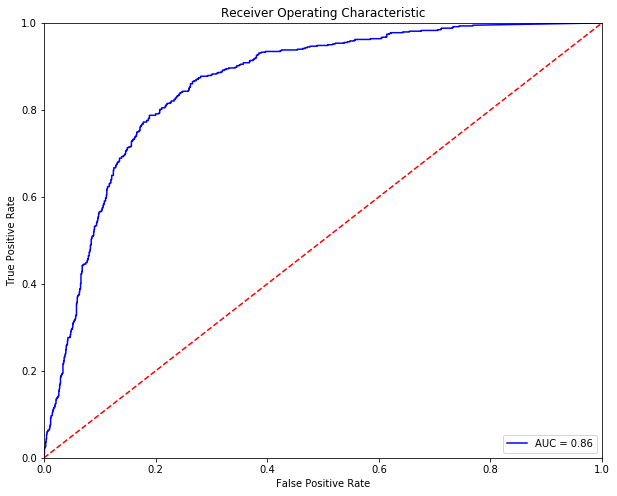

Optimal Threshold is 0.2908216269141529
Accuracy on test data is: 0.7932989690721649


Predicted  False  True  __all__
Actual                         
False       1080   281     1361
True         120   459      579
__all__     1200   740     1940



Logistic Regression
Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.7,False,True,0.7,50,ovr,l2,sag,0.1


Accuracy of the  Logistic  model for the training data is: 0.8063144329896907

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4807   622     5429
True         881  1450     2331
__all__     5688  2072     7760

Accuracy of the  Logistic  model for test data is: 0.8092783505154639

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1217   144     1361
True         226   353      579
__all__     1443   497     1940

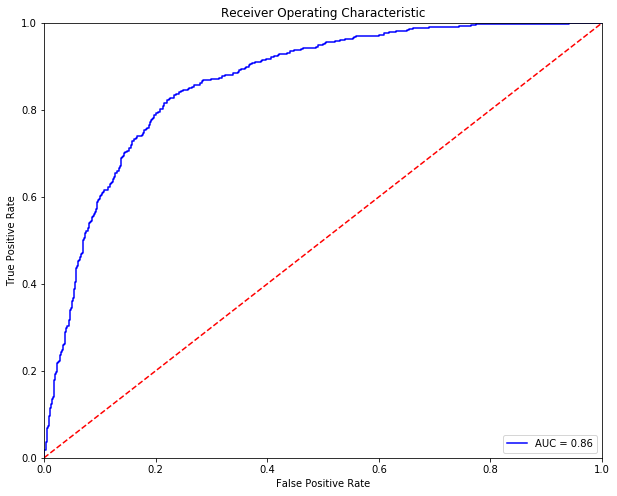

Optimal Threshold is 0.24776918742334234
Accuracy on test data is: 0.7948453608247422


Predicted  False  True  __all__
Actual                         
False       1082   279     1361
True         119   460      579
__all__     1201   739     1940



RandomForest Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7,8,9,10,11
index,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,oob_score,random_state,verbose
0,gini,10,auto,10,0.1,10,10,0.1,200,False,0,0


Accuracy of the  Random Forest Trees  model for the training data is: 0.6996134020618556

Confusion Matrix for Training data is:


Predicted     0  1  __all__
Actual                     
0          5429  0     5429
1          2331  0     2331
__all__    7760  0     7760

Accuracy of the  Random Forest Trees  model for test data is: 0.7015463917525773

Confusion Matrix for test data is:


Predicted     0  1  __all__
Actual                     
0          1361  0     1361
1           579  0      579
__all__    1940  0     1940

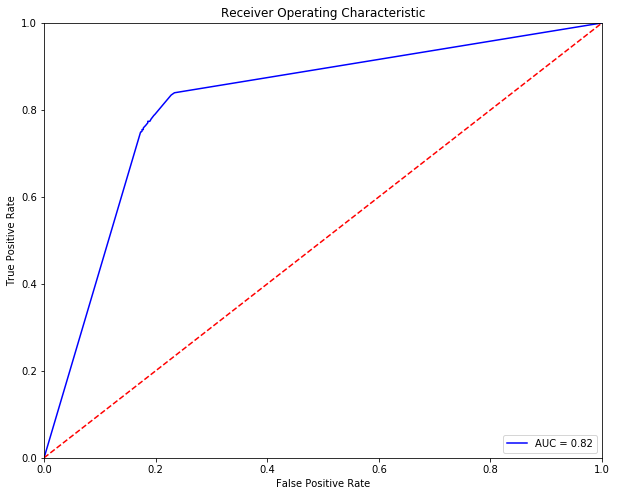

Optimal Threshold is 0.2796380497745892
Accuracy on test data is: 0.7984536082474227


Predicted  False  True  __all__
Actual                         
False       1093   268     1361
True         123   456      579
__all__     1216   724     1940

5429
0
0
5429
2331
0
0
2331
1.0
0.0
0.0
1.0
1361
0
0
1361
579
0
0
579
1.0
0.0
0.0
1.0


Adaoost Classifier
Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME,1,400,0


Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8139175257731959

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4641   788     5429
True         656  1675     2331
__all__     5297  2463     7760

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8041237113402062

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1159   202     1361
True         178   401      579
__all__     1337   603     1940

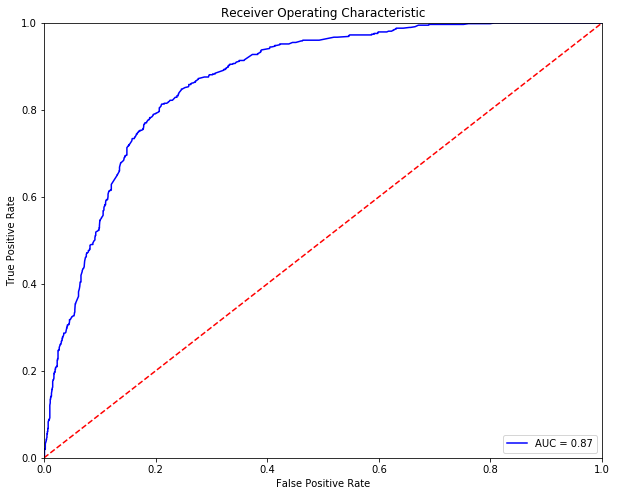

Optimal Threshold is 0.47691918210301204
Accuracy on test data is: 0.7969072164948454


Predicted  False  True  __all__
Actual                         
False       1087   274     1361
True         120   459      579
__all__     1207   733     1940



GradientBoosting Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state,subsample
0,mse,0.03,exponential,5,0.2,150,0,0.7


Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8177835051546392

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4664   765     5429
True         649  1682     2331
__all__     5313  2447     7760

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8108247422680412

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1171   190     1361
True         177   402      579
__all__     1348   592     1940

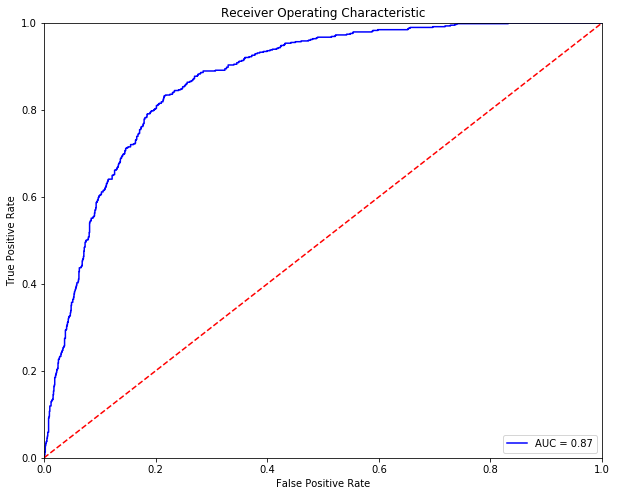

Optimal Threshold is 0.34586452902152454
Accuracy on test data is: 0.8015463917525774


Predicted  False  True  __all__
Actual                         
False       1091   270     1361
True         115   464      579
__all__     1206   734     1940



ExtraTree Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,gini,10,auto,0.001,2,2,0,best


Accuracy of the  Extra Decision Tree  model for the training data is: 0.8092783505154639

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4661   768     5429
True         712  1619     2331
__all__     5373  2387     7760

Accuracy of the  Extra Decision Tree  model for test data is: 0.8097938144329897

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1168   193     1361
True         176   403      579
__all__     1344   596     1940

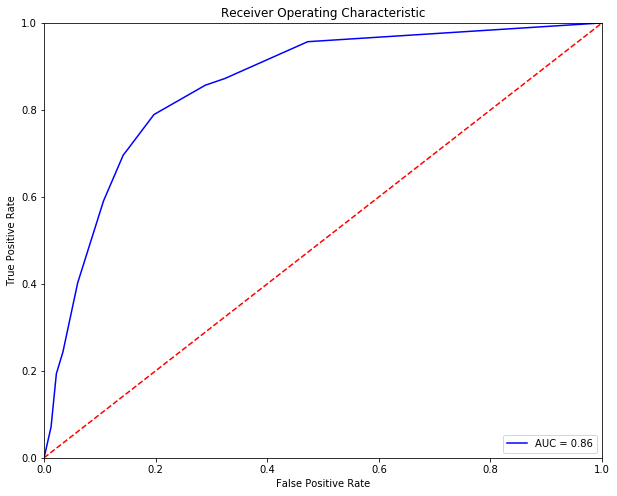

Optimal Threshold is 0.42203742203742206
Accuracy on test data is: 0.8082474226804124


Predicted  False  True  __all__
Actual                         
False       1158   203     1361
True         169   410      579
__all__     1327   613     1940



Bagging Classifier
Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.6,0.3,300,True,0


Accuracy of the  Bagging  model for the training data is: 0.9278350515463918

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5243   186     5429
True         374  1957     2331
__all__     5617  2143     7760

Accuracy of the  Bagging  model for test data is: 0.8072164948453608

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1188   173     1361
True         201   378      579
__all__     1389   551     1940

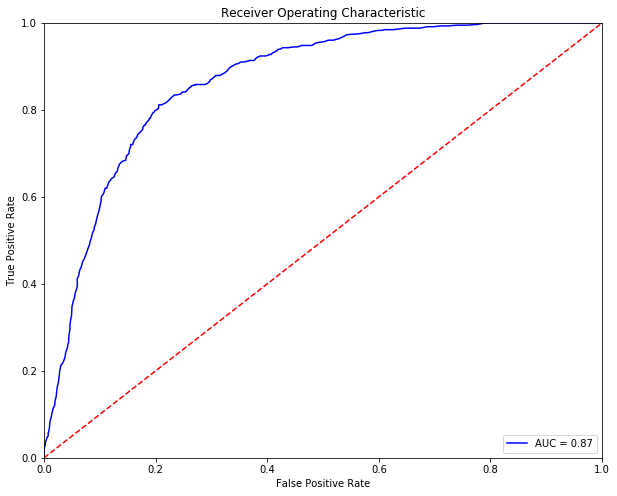

Optimal Threshold is 0.38
Accuracy on test data is: 0.8005154639175258


Predicted  False  True  __all__
Actual                         
False       1091   270     1361
True         117   462      579
__all__     1208   732     1940



Neural Network-1
The accuracy of the model on training data is: 0.8698453608247423


Predicted  False  True  __all__
Actual                         
False       4869   560     5429
True         450  1881     2331
__all__     5319  2441     7760

The accuracy of the model on test data is: 0.7943298969072164


Predicted  False  True  __all__
Actual                         
False       1150   211     1361
True         188   391      579
__all__     1338   602     1940

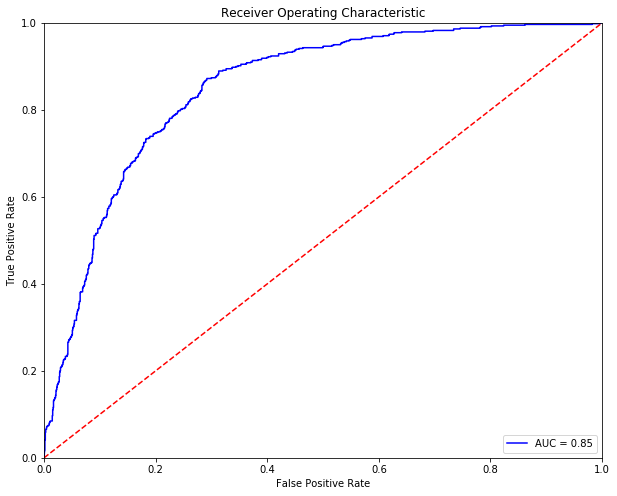

Optimal Threshold is 0.3253252
Accuracy of Logistic Model on training data is: 0.7757731958762887


Predicted  False  True  __all__
Actual                         
False       1056   305     1361
True         130   449      579
__all__     1186   754     1940



Neural Network-2
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.8min finished


The accuracy of the model on training data is: 0.8134020618556701


Predicted  False  True  __all__
Actual                         
False       4626   803     5429
True         645  1686     2331
__all__     5271  2489     7760

The accuracy of the model on test data is: 0.8128865979381443


Predicted  False  True  __all__
Actual                         
False       1167   194     1361
True         169   410      579
__all__     1336   604     1940

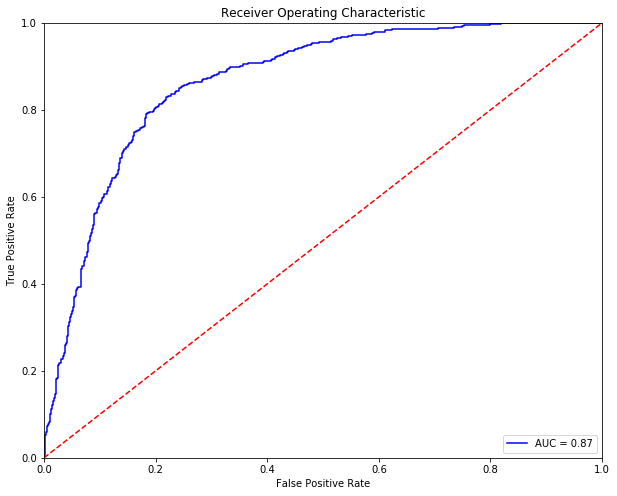

Optimal Threshold is 0.26241547
Accuracy on test data is: 0.8030927835051547


Predicted  False  True  __all__
Actual                         
False       1094   267     1361
True         115   464      579
__all__     1209   731     1940

In [22]:
feat_imp_10=[None]*4
j=0
for i in range(0,9):
    if i>=2 and i<=5:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,feat_imp_10[j]=f[i](X_train,Y_train,X_test,Y_test)
        j=j+1
    else:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc=f[i](X_train,Y_train,X_test,Y_test)
    table_80_50_10_train.loc[i]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
    table_80_50_10_test.loc[i] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
    table_80_50_10_test_roc.loc[i]=([accuracy, cm.TP,  cm.TN,   cm.FP, cm.FN,  cm.FPR, cm.FNR, threshold,roc_auc])
    print("\n")

In [23]:
table_80_50_10_train['index']=ind_columns
table_80_50_10_test['index']=ind_columns
table_80_50_10_test_roc['index']=ind_columns
table_80_50_10_test.set_index(['index'],drop=True,inplace=True)
table_80_50_10_train.set_index(['index'],drop=True,inplace=True)
table_80_50_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_10_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_10_test_roc)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,1.000000,2331.00000,5429.00000,0.00000,0.00000,0.000000,0.000000
LogisticRegression,0.806314,1450.00000,4807.00000,622.00000,881.00000,0.114570,0.377949
RandomForestClassifier,0.699613,3798.20116,1630.79884,1630.79884,700.20116,0.699613,0.300387
AdaBoostClassifier,0.813918,1675.00000,4641.00000,788.00000,656.00000,0.145146,0.281424
GradientBoostingClassifier,0.817784,1682.00000,4664.00000,765.00000,649.00000,0.140910,0.278421
ExtraTreeClassifier,0.809278,1619.00000,4661.00000,768.00000,712.00000,0.141463,0.305448
BaggingClassifier,0.927835,1957.00000,5243.00000,186.00000,374.00000,0.034260,0.160446
Neural Network-1,0.869845,1881.00000,4869.00000,560.00000,450.00000,0.103150,0.193050
Neural-Network-2,0.813402,1686.00000,4626.00000,803.00000,645.00000,0.147909,0.276705


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.802062,347.000000,1209.000000,152.000000,232.000000,0.111683,0.400691
LogisticRegression,0.809278,353.000000,1217.000000,144.000000,226.000000,0.105805,0.390328
RandomForestClassifier,0.701546,954.804639,406.195361,406.195361,172.804639,0.701546,0.298454
AdaBoostClassifier,0.804124,401.000000,1159.000000,202.000000,178.000000,0.148420,0.307427
GradientBoostingClassifier,0.810825,402.000000,1171.000000,190.000000,177.000000,0.139603,0.305699
ExtraTreeClassifier,0.809794,403.000000,1168.000000,193.000000,176.000000,0.141807,0.303972
BaggingClassifier,0.807216,378.000000,1188.000000,173.000000,201.000000,0.127112,0.347150
Neural Network-1,0.794330,391.000000,1150.000000,211.000000,188.000000,0.155033,0.324698
Neural-Network-2,0.812887,410.000000,1167.000000,194.000000,169.000000,0.142542,0.291883


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,TP,TN,FP,FN,FPR,FNR,threshold,auc
index,,,,,,,,,
KNeighborsClassifier,0.793299,459.0,1080.0,281.0,120.0,0.206466,0.207254,0.290822,0.861102
LogisticRegression,0.794845,460.0,1082.0,279.0,119.0,0.204996,0.205527,0.247769,0.864837
RandomForestClassifier,0.798454,456.0,1093.0,268.0,123.0,0.196914,0.212435,0.279638,0.817928
AdaBoostClassifier,0.796907,459.0,1087.0,274.0,120.0,0.201323,0.207254,0.476919,0.868538
GradientBoostingClassifier,0.801546,464.0,1091.0,270.0,115.0,0.198384,0.198618,0.345865,0.872694
ExtraTreeClassifier,0.808247,410.0,1158.0,203.0,169.0,0.149155,0.291883,0.422037,0.857373
BaggingClassifier,0.800515,462.0,1091.0,270.0,117.0,0.198384,0.202073,0.380000,0.865774
Neural Network-1,0.775773,449.0,1056.0,305.0,130.0,0.224100,0.224525,0.325325,0.849993
Neural-Network-2,0.803093,464.0,1094.0,267.0,115.0,0.196179,0.198618,0.262415,0.865840


#### Random State 20

In [24]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_20.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))
Y=Y.values

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)


## Table to store training and test measures
table_80_50_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,BYR,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5f5a2b60a4480e331c,85,2,2,1,5,86,2.523256,1.813953,30.546512,157.523256,2244.197674,6,38,1,5,0,8,1,0,6,2,2,0,1,5,6,1,0,1,0,0,0,0,0,3
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e107c9b0e15a44099a,358,6,13,8,133,363,22.209366,12.785124,63.633609,2778.881543,24241.719008,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,161,93,61,44,0,0


1 -> Infected
0 -> Uninfected


User
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5f5a2b60a4480e331c    0
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e107c9b0e15a44099a    0
4ba926e44bbc5718a83b0a3d37d4b38344b8413313a380c59079fb0ac246f6d8    1
f27f0a15e884be036824b69b19111caa9597b97f2bbd91941e15671027811583    0
d80a556c9a21d199c8e0b539e665a577a1c38c2a1d6172c68c634889aa7a1c6e    1
Name: Target, dtype: int64

Variance explained using 13 components is: 0.9384105861303276
The train/test split ratio is 80:20


K-Nearest Neighbors
Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,manhattan,30,distance


Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5425     0     5425
True           0  2335     2335
__all__     5425  2335     7760

Accuracy of the  KNN  model for test data is: 0.7881443298969072

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1209   156     1365
True         255   320      575
__all__     1464   476     1940

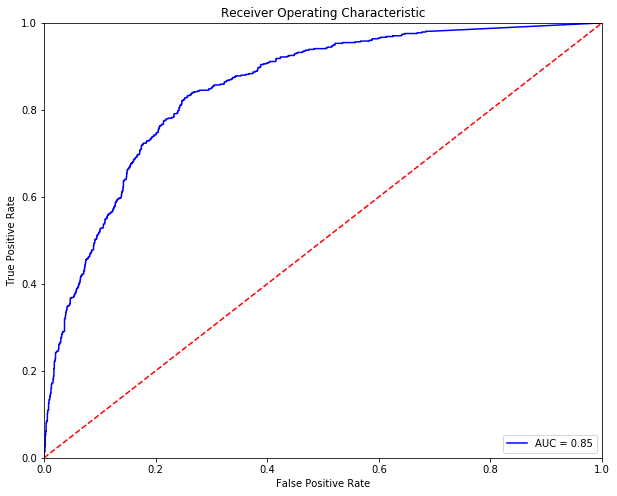

Optimal Threshold is 0.3048461414236478
Accuracy on test data is: 0.7788659793814433


Predicted  False  True  __all__
Actual                         
False       1063   302     1365
True         127   448      575
__all__     1190   750     1940



Logistic Regression
Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.5,False,False,0.5,50,multinomial,l2,newton-cg,1e-05


Accuracy of the  Logistic  model for the training data is: 0.8021907216494846

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4449   976     5425
True         559  1776     2335
__all__     5008  2752     7760

Accuracy of the  Logistic  model for test data is: 0.797938144329897

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1129   236     1365
True         156   419      575
__all__     1285   655     1940

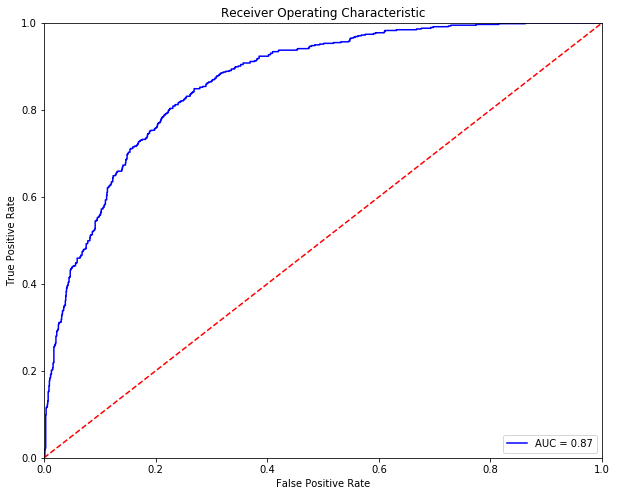

Optimal Threshold is 0.45958877284406163
Accuracy on test data is: 0.7855670103092783


Predicted  False  True  __all__
Actual                         
False       1073   292     1365
True         124   451      575
__all__     1197   743     1940



RandomForest Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7,8,9,10,11
index,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,oob_score,random_state,verbose
0,gini,10,auto,10,0.1,10,10,0.1,200,False,0,0


Accuracy of the  Random Forest Trees  model for the training data is: 0.6990979381443299

Confusion Matrix for Training data is:


Predicted     0  1  __all__
Actual                     
0          5425  0     5425
1          2335  0     2335
__all__    7760  0     7760

Accuracy of the  Random Forest Trees  model for test data is: 0.7036082474226805

Confusion Matrix for test data is:


Predicted     0  1  __all__
Actual                     
0          1365  0     1365
1           575  0      575
__all__    1940  0     1940

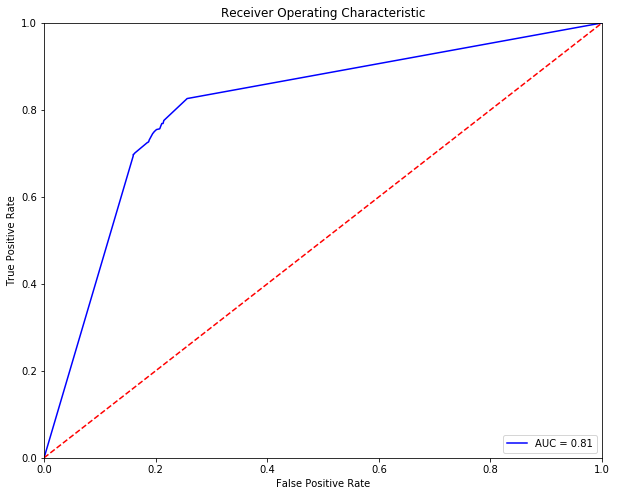

Optimal Threshold is 0.2649172341191586
Accuracy on test data is: 0.7814432989690722


Predicted  False  True  __all__
Actual                         
False       1074   291     1365
True         133   442      575
__all__     1207   733     1940

5425
0
0
5425
2335
0
0
2335
1.0
0.0
0.0
1.0
1365
0
0
1365
575
0
0
575
1.0
0.0
0.0
1.0


Adaoost Classifier
Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME.R,0.5,50,0


Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8094072164948454

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4669   756     5425
True         723  1612     2335
__all__     5392  2368     7760

Accuracy of the  AdaBoostClassifier  model for test data is: 0.790721649484536

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1171   194     1365
True         212   363      575
__all__     1383   557     1940

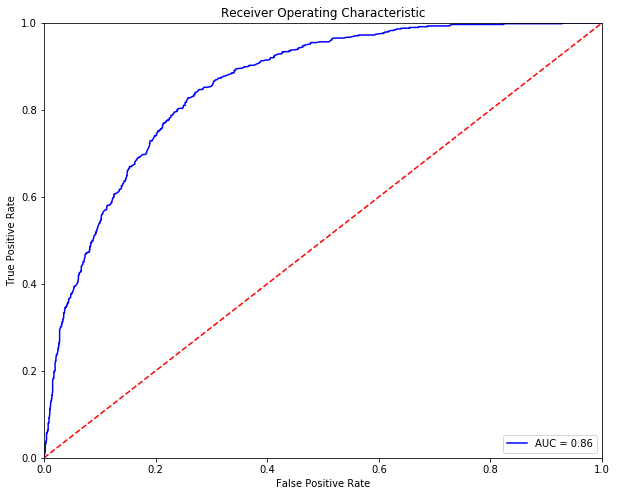

Optimal Threshold is 0.4919506150635833
Accuracy on test data is: 0.777319587628866


Predicted  False  True  __all__
Actual                         
False       1062   303     1365
True         129   446      575
__all__     1191   749     1940



GradientBoosting Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state,subsample
0,mse,0.05,deviance,10,0.3,150,0,1


Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8168814432989691

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4691   734     5425
True         687  1648     2335
__all__     5378  2382     7760

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.7984536082474227

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1174   191     1365
True         200   375      575
__all__     1374   566     1940

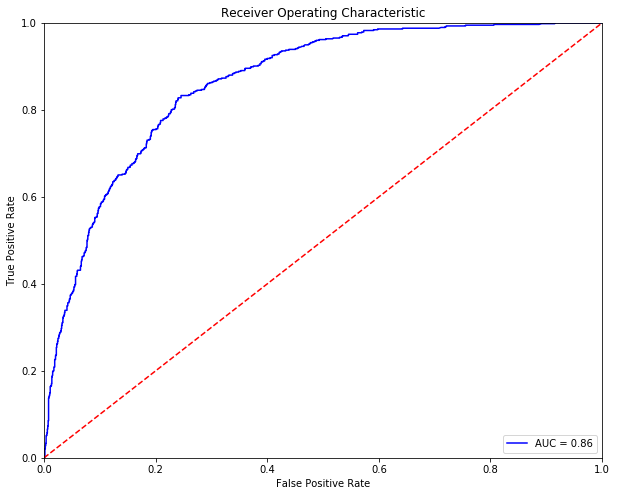

Optimal Threshold is 0.32807144113378456
Accuracy on test data is: 0.7814432989690722


Predicted  False  True  __all__
Actual                         
False       1067   298     1365
True         126   449      575
__all__     1193   747     1940



ExtraTree Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,entropy,20,auto,0.001,2,2,0,best


Accuracy of the  Extra Decision Tree  model for the training data is: 0.7984536082474227

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4701   724     5425
True         840  1495     2335
__all__     5541  2219     7760

Accuracy of the  Extra Decision Tree  model for test data is: 0.7819587628865979

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1174   191     1365
True         232   343      575
__all__     1406   534     1940

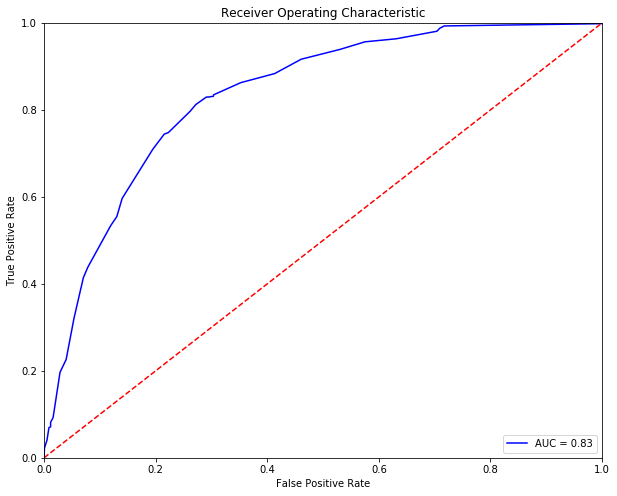

Optimal Threshold is 0.38636363636363635
Accuracy on test data is: 0.772680412371134


Predicted  False  True  __all__
Actual                         
False       1071   294     1365
True         147   428      575
__all__     1218   722     1940



Bagging Classifier
Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.6,0.3,300,True,0


Accuracy of the  Bagging  model for the training data is: 0.935180412371134

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5272   153     5425
True         350  1985     2335
__all__     5622  2138     7760

Accuracy of the  Bagging  model for test data is: 0.7948453608247422

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1181   184     1365
True         214   361      575
__all__     1395   545     1940

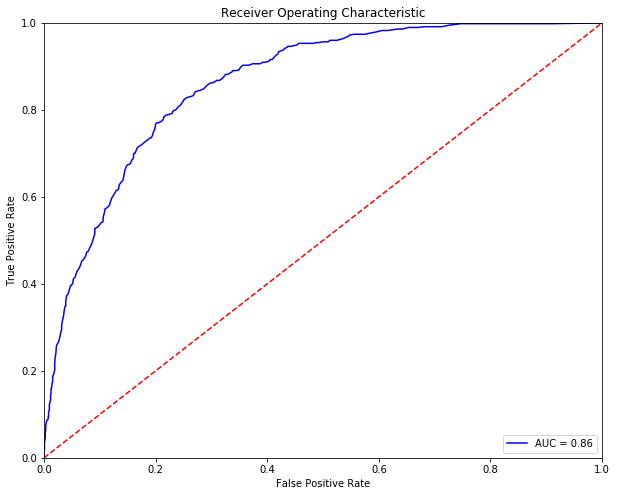

Optimal Threshold is 0.38
Accuracy on test data is: 0.7850515463917526


Predicted  False  True  __all__
Actual                         
False       1072   293     1365
True         124   451      575
__all__     1196   744     1940



Neural Network-1
The accuracy of the model on training data is: 0.8634020618556701


Predicted  False  True  __all__
Actual                         
False       4887   538     5425
True         522  1813     2335
__all__     5409  2351     7760

The accuracy of the model on test data is: 0.7824742268041237


Predicted  False  True  __all__
Actual                         
False       1151   214     1365
True         208   367      575
__all__     1359   581     1940

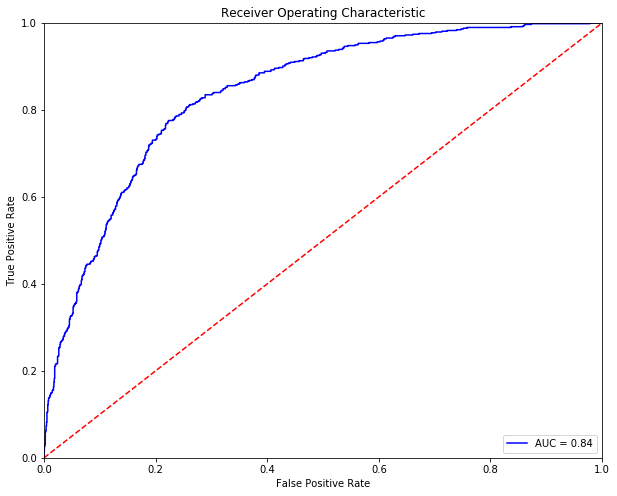

Optimal Threshold is 0.3335281
Accuracy of Logistic Model on training data is: 0.7757731958762887


Predicted  False  True  __all__
Actual                         
False       1060   305     1365
True         130   445      575
__all__     1190   750     1940



Neural Network-2
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.5min finished


The accuracy of the model on training data is: 0.8051546391752578


Predicted  False  True  __all__
Actual                         
False       4411  1014     5425
True         498  1837     2335
__all__     4909  2851     7760

The accuracy of the model on test data is: 0.7850515463917526


Predicted  False  True  __all__
Actual                         
False       1100   265     1365
True         152   423      575
__all__     1252   688     1940

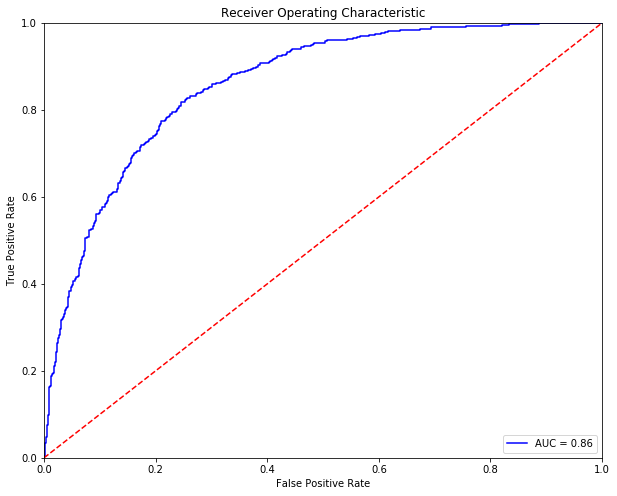

Optimal Threshold is 0.36427703
Accuracy on test data is: 0.7809278350515464


Predicted  False  True  __all__
Actual                         
False       1067   298     1365
True         127   448      575
__all__     1194   746     1940

In [25]:
feat_imp_20=[None]*4
j=0
for i in range(0,9):
    if i>=2 and i<=5:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,feat_imp_20[j]=f[i](X_train,Y_train,X_test,Y_test)
        j=j+1
    else:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc=f[i](X_train,Y_train,X_test,Y_test)
    table_80_50_20_train.loc[i]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
    table_80_50_20_test.loc[i] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
    table_80_50_20_test_roc.loc[i]=([accuracy, cm.TP,  cm.TN,   cm.FP, cm.FN,  cm.FPR, cm.FNR, threshold,roc_auc])
    print("\n")

In [26]:
table_80_50_20_train['index']=ind_columns
table_80_50_20_test['index']=ind_columns
table_80_50_20_test_roc['index']=ind_columns
table_80_50_20_test.set_index(['index'],drop=True,inplace=True)
table_80_50_20_train.set_index(['index'],drop=True,inplace=True)
table_80_50_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_20_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_20_test_roc)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,1.000000,2335.000000,5425.000000,0.000000,0.000000,0.000000,0.000000
LogisticRegression,0.802191,1776.000000,4449.000000,976.000000,559.000000,0.179908,0.239400
RandomForestClassifier,0.699098,3792.606314,1632.393686,1632.393686,702.606314,0.699098,0.300902
AdaBoostClassifier,0.809407,1612.000000,4669.000000,756.000000,723.000000,0.139355,0.309636
GradientBoostingClassifier,0.816881,1648.000000,4691.000000,734.000000,687.000000,0.135300,0.294218
ExtraTreeClassifier,0.798454,1495.000000,4701.000000,724.000000,840.000000,0.133456,0.359743
BaggingClassifier,0.935180,1985.000000,5272.000000,153.000000,350.000000,0.028203,0.149893
Neural Network-1,0.863402,1813.000000,4887.000000,538.000000,522.000000,0.099171,0.223555
Neural-Network-2,0.805155,1837.000000,4411.000000,1014.000000,498.000000,0.186912,0.213276


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.788144,320.000000,1209.000000,156.000000,255.000000,0.114286,0.443478
LogisticRegression,0.797938,419.000000,1129.000000,236.000000,156.000000,0.172894,0.271304
RandomForestClassifier,0.703608,960.425258,404.574742,404.574742,170.425258,0.703608,0.296392
AdaBoostClassifier,0.790722,363.000000,1171.000000,194.000000,212.000000,0.142125,0.368696
GradientBoostingClassifier,0.798454,375.000000,1174.000000,191.000000,200.000000,0.139927,0.347826
ExtraTreeClassifier,0.781959,343.000000,1174.000000,191.000000,232.000000,0.139927,0.403478
BaggingClassifier,0.794845,361.000000,1181.000000,184.000000,214.000000,0.134799,0.372174
Neural Network-1,0.782474,367.000000,1151.000000,214.000000,208.000000,0.156777,0.361739
Neural-Network-2,0.785052,423.000000,1100.000000,265.000000,152.000000,0.194139,0.264348


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,TP,TN,FP,FN,FPR,FNR,threshold,auc
index,,,,,,,,,
KNeighborsClassifier,0.778866,448.0,1063.0,302.0,127.0,0.221245,0.220870,0.304846,0.849872
LogisticRegression,0.785567,451.0,1073.0,292.0,124.0,0.213919,0.215652,0.459589,0.866549
RandomForestClassifier,0.781443,442.0,1074.0,291.0,133.0,0.213187,0.231304,0.264917,0.808015
AdaBoostClassifier,0.777320,446.0,1062.0,303.0,129.0,0.221978,0.224348,0.491951,0.858121
GradientBoostingClassifier,0.781443,449.0,1067.0,298.0,126.0,0.218315,0.219130,0.328071,0.862870
ExtraTreeClassifier,0.772680,428.0,1071.0,294.0,147.0,0.215385,0.255652,0.386364,0.834123
BaggingClassifier,0.785052,451.0,1072.0,293.0,124.0,0.214652,0.215652,0.380000,0.861897
Neural Network-1,0.775773,445.0,1060.0,305.0,130.0,0.223443,0.226087,0.333528,0.839896
Neural-Network-2,0.780928,448.0,1067.0,298.0,127.0,0.218315,0.220870,0.364277,0.859530


In [27]:
table_80_50_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_50_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_50_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

table_80_50_train_avg['accuracy']=(table_80_50_train['accuracy']+table_80_50_10_train['accuracy']+table_80_50_20_train['accuracy'])/3.0
table_80_50_train_avg['FPR']=(table_80_50_train['FPR']+table_80_50_10_train['FPR']+table_80_50_20_train['FPR'])/3.0
table_80_50_train_avg['FNR']=(table_80_50_train['FNR']+table_80_50_10_train['FNR']+table_80_50_20_train['FNR'])/3.0

table_80_50_test_avg['accuracy']=(table_80_50_test['accuracy']+table_80_50_10_test['accuracy']+table_80_50_20_test['accuracy'])/3.0
table_80_50_test_avg['FPR']=(table_80_50_test['FPR']+table_80_50_10_test['FPR']+table_80_50_20_test['FPR'])/3.0
table_80_50_test_avg['FNR']=(table_80_50_test['FNR']+table_80_50_10_test['FNR']+table_80_50_20_test['FNR'])/3.0

table_80_50_test_roc_avg['accuracy']=(table_80_50_test_roc['accuracy']+table_80_50_10_test_roc['accuracy']+table_80_50_20_test_roc['accuracy'])/3.0
table_80_50_test_roc_avg['FPR']=(table_80_50_test_roc['FPR']+table_80_50_10_test_roc['FPR']+table_80_50_20_test_roc['FPR'])/3.0
table_80_50_test_roc_avg['FNR']=(table_80_50_test_roc['FNR']+table_80_50_10_test_roc['FNR']+table_80_50_20_test_roc['FNR'])/3.0
table_80_50_test_roc_avg['auc']=(table_80_50_test_roc['auc']+table_80_50_10_test_roc['auc']+table_80_50_20_test_roc['auc'])/3.0


print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_80_50_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_test_roc_avg)

feat_imp_80_50=list(map(sum, zip(feat_imp,feat_imp_10,feat_imp_20)))
print("Average feature imortance for the 3 random sets:")
feat_impt_plot(sum(feat_imp_80_50)/12)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


,accuracy,FPR,FNR
index,,,
KNeighborsClassifier,1.000000,0.000000,0.000000
LogisticRegression,0.803737,0.156742,0.288503
RandomForestClassifier,0.700387,0.700387,0.299613
AdaBoostClassifier,0.813015,0.136233,0.305725
GradientBoostingClassifier,0.815851,0.136037,0.296698
ExtraTreeClassifier,0.804296,0.148999,0.304595
BaggingClassifier,0.933677,0.027792,0.156427
Neural Network-1,0.866581,0.086213,0.244109
Neural-Network-2,0.809192,0.164564,0.252255


Comparision Table for Test Accuracies:


,accuracy,FPR,FNR
index,,,
KNeighborsClassifier,0.795533,0.109926,0.423375
LogisticRegression,0.808419,0.146671,0.296529
RandomForestClassifier,0.698454,0.698454,0.301546
AdaBoostClassifier,0.801546,0.137924,0.338519
GradientBoostingClassifier,0.806529,0.136493,0.325440
ExtraTreeClassifier,0.802062,0.148430,0.314020
BaggingClassifier,0.803265,0.124894,0.362903
Neural Network-1,0.782646,0.142771,0.388546
Neural-Network-2,0.804983,0.160273,0.275260


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,FPR,FNR,auc
index,,,,
KNeighborsClassifier,0.792268,0.207544,0.208154,0.860453
LogisticRegression,0.797251,0.202372,0.203621,0.871169
RandomForestClassifier,0.798797,0.193957,0.217797,0.821630
AdaBoostClassifier,0.793643,0.205327,0.208759,0.867734
GradientBoostingClassifier,0.798282,0.201633,0.201923,0.872346
ExtraTreeClassifier,0.798454,0.176032,0.260715,0.848337
BaggingClassifier,0.797251,0.201159,0.206352,0.867994
Neural Network-1,0.776117,0.223366,0.225079,0.847348
Neural-Network-2,0.796392,0.203139,0.204721,0.866410


Average feature imortance for the 3 random sets:


###  <a id='1.B' style="text-decoration : none; color : #000000;">B. 70:30 Train Test Split</a>
#### Random State 0

In [28]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_0.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))
Y=Y.values

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)


## Table to store training and test measures
table_70_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,BYR,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dcafa2634bb293a127a,4568,42,49,57,1200,5038,146.820762,56.766574,78.731441,5765.397777,184063.583962,578,185,138,268,205,180,149,136,156,104,120,158,254,116,207,118,134,215,177,142,343,221,295,439
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d8142614e2006d9d3c,16,4,6,5,7,16,5.937500,9.375000,34.125000,1506.000000,3370.125000,0,0,0,0,0,0,0,0,0,0,2,3,2,0,0,0,7,0,2,0,0,0,0,0


1 -> Infected
0 -> Uninfected


User
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dcafa2634bb293a127a    1
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d8142614e2006d9d3c    0
d348da18a4a8399e475122a0c73774f25fc9e7a1e047cf13843f8937afc814cc    0
ebf7553759a0cdbba0add7b038d6fab41a22dead2830bb0c35b18bfab37a2218    0
edec2b03986c67647a3e7b653f30189e134e546ae0da8b2a8e77660c60bbef5a    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.9395643131079252
The train/test split ratio is 70:30


K-Nearest Neighbors
Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,manhattan,50,uniform


Accuracy of the  KNN  model for the training data is: 0.8106038291605302

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4299   472     4771
True         814  1205     2019
__all__     5113  1677     6790

Accuracy of the  KNN  model for test data is: 0.8030927835051547

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1828   191     2019
True         382   509      891
__all__     2210   700     2910

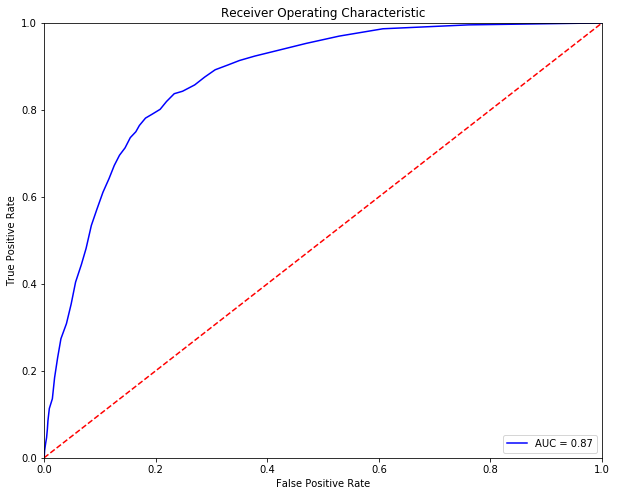

Optimal Threshold is 0.3
Accuracy on test data is: 0.8013745704467354


Predicted  False  True  __all__
Actual                         
False       1628   391     2019
True         187   704      891
__all__     1815  1095     2910



Logistic Regression
Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.5,False,False,0.5,50,multinomial,l2,newton-cg,1e-05


Accuracy of the  Logistic  model for the training data is: 0.8017673048600884

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3931   840     4771
True         506  1513     2019
__all__     4437  2353     6790

Accuracy of the  Logistic  model for test data is: 0.8178694158075601

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1685   334     2019
True         196   695      891
__all__     1881  1029     2910

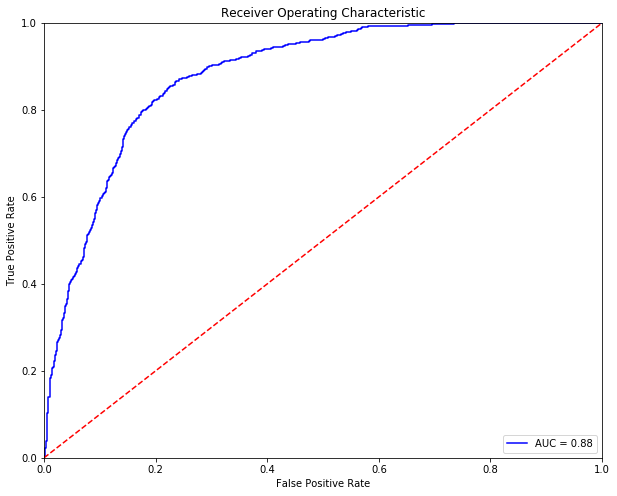

Optimal Threshold is 0.4709117055376606
Accuracy on test data is: 0.8092783505154639


Predicted  False  True  __all__
Actual                         
False       1634   385     2019
True         170   721      891
__all__     1804  1106     2910



RandomForest Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7,8,9,10,11
index,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,oob_score,random_state,verbose
0,gini,10,auto,10,0.1,10,10,0.1,200,False,0,0


Accuracy of the  Random Forest Trees  model for the training data is: 0.7026509572901325

Confusion Matrix for Training data is:


Predicted     0  1  __all__
Actual                     
0          4771  0     4771
1          2019  0     2019
__all__    6790  0     6790

Accuracy of the  Random Forest Trees  model for test data is: 0.6938144329896907

Confusion Matrix for test data is:


Predicted     0  1  __all__
Actual                     
0          2019  0     2019
1           891  0      891
__all__    2910  0     2910

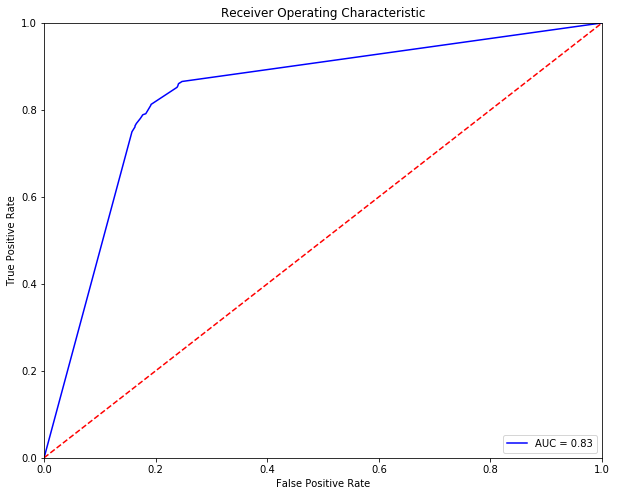

Optimal Threshold is 0.31539115741262674
Accuracy on test data is: 0.8096219931271478


Predicted  False  True  __all__
Actual                         
False       1651   368     2019
True         186   705      891
__all__     1837  1073     2910

4771
0
0
4771
2019
0
0
2019
1.0
0.0
0.0
1.0
2019
0
0
2019
891
0
0
891
1.0
0.0
0.0
1.0


Adaoost Classifier
Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME,1,400,0


Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8116347569955817

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4123   648     4771
True         631  1388     2019
__all__     4754  2036     6790

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8209621993127147

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1759   260     2019
True         261   630      891
__all__     2020   890     2910

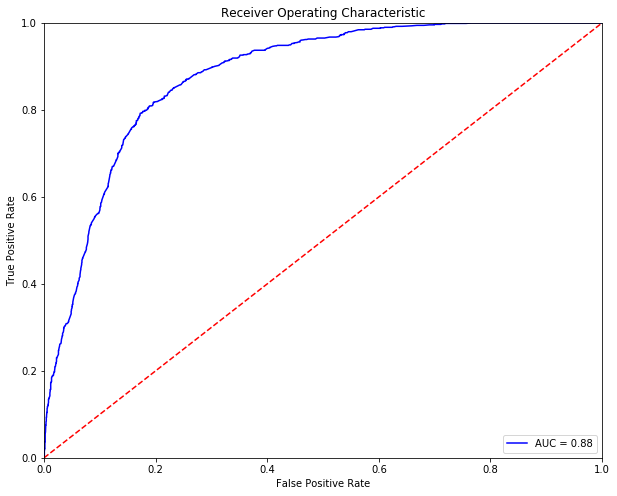

Optimal Threshold is 0.47755788451990716
Accuracy on test data is: 0.8103092783505155


Predicted  False  True  __all__
Actual                         
False       1637   382     2019
True         170   721      891
__all__     1807  1103     2910



GradientBoosting Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state,subsample
0,mse,0.05,exponential,20,0.2,100,0,0.5


Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8108983799705449

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4103   668     4771
True         616  1403     2019
__all__     4719  2071     6790

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8147766323024055

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1738   281     2019
True         258   633      891
__all__     1996   914     2910

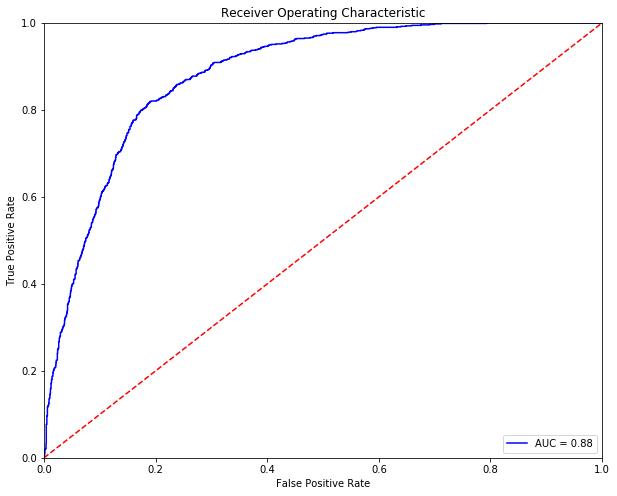

Optimal Threshold is 0.3543482307555786
Accuracy on test data is: 0.8134020618556701


Predicted  False  True  __all__
Actual                         
False       1643   376     2019
True         167   724      891
__all__     1810  1100     2910



ExtraTree Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,gini,10,auto,0.001,2,2,0,best


Accuracy of the  Extra Decision Tree  model for the training data is: 0.8029455081001473

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3915   856     4771
True         482  1537     2019
__all__     4397  2393     6790

Accuracy of the  Extra Decision Tree  model for test data is: 0.813745704467354

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1670   349     2019
True         193   698      891
__all__     1863  1047     2910

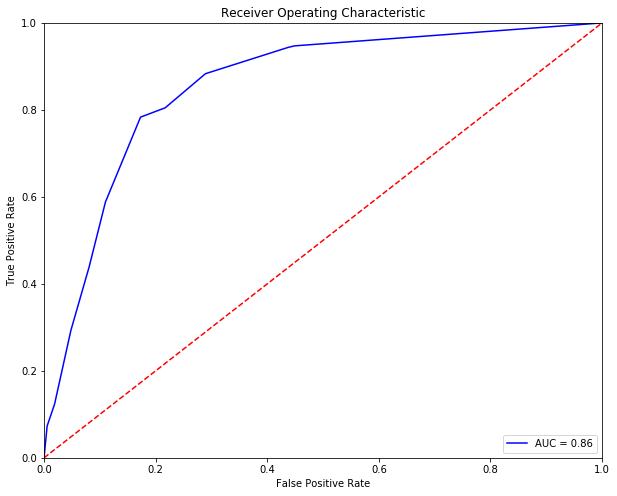

Optimal Threshold is 0.352112676056338
Accuracy on test data is: 0.813745704467354


Predicted  False  True  __all__
Actual                         
False       1670   349     2019
True         193   698      891
__all__     1863  1047     2910



Bagging Classifier
Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.6,0.4,300,True,0


Accuracy of the  Bagging  model for the training data is: 0.9624447717231223

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4731    40     4771
True         215  1804     2019
__all__     4946  1844     6790

Accuracy of the  Bagging  model for test data is: 0.8109965635738832

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1753   266     2019
True         284   607      891
__all__     2037   873     2910

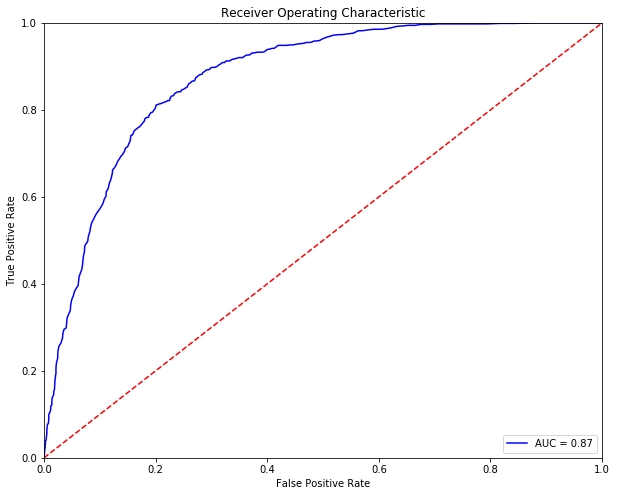

Optimal Threshold is 0.3933333333333333
Accuracy on test data is: 0.8020618556701031


Predicted  False  True  __all__
Actual                         
False       1623   396     2019
True         180   711      891
__all__     1803  1107     2910



Neural Network-1
The accuracy of the model on training data is: 0.8597938144329897


Predicted  False  True  __all__
Actual                         
False       4337   434     4771
True         518  1501     2019
__all__     4855  1935     6790

The accuracy of the model on test data is: 0.7872852233676976


Predicted  False  True  __all__
Actual                         
False       1729   290     2019
True         329   562      891
__all__     2058   852     2910

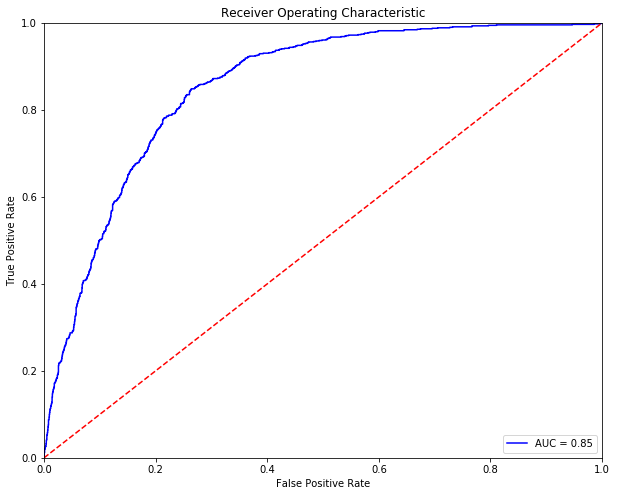

Optimal Threshold is 0.34771594
Accuracy of Logistic Model on training data is: 0.7828178694158076


Predicted  False  True  __all__
Actual                         
False       1582   437     2019
True         195   696      891
__all__     1777  1133     2910



Neural Network-2
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.3min finished


The accuracy of the model on training data is: 0.8075110456553756


Predicted  False  True  __all__
Actual                         
False       4033   738     4771
True         569  1450     2019
__all__     4602  2188     6790

The accuracy of the model on test data is: 0.8209621993127147


Predicted  False  True  __all__
Actual                         
False       1727   292     2019
True         229   662      891
__all__     1956   954     2910

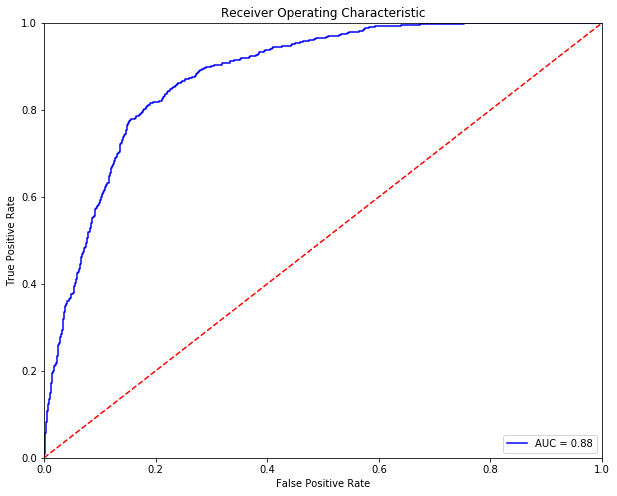

Optimal Threshold is 0.33247298
Accuracy on test data is: 0.811340206185567


Predicted  False  True  __all__
Actual                         
False       1639   380     2019
True         169   722      891
__all__     1808  1102     2910

In [29]:
feat_imp=[None]*4
j=0
for i in range(0,9):
    if i>=2 and i<=5:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,feat_imp[j]=f[i](X_train,Y_train,X_test,Y_test)
        j=j+1
    else:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc=f[i](X_train,Y_train,X_test,Y_test)
    table_70_50_train.loc[i]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
    table_70_50_test.loc[i] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
    table_70_50_test_roc.loc[i]=([accuracy, cm.TP,  cm.TN,   cm.FP, cm.FN,  cm.FPR, cm.FNR, threshold,roc_auc])
    print("\n")

In [30]:
table_70_50_train['index']=ind_columns
table_70_50_test['index']=ind_columns
table_70_50_test_roc['index']=ind_columns

table_70_50_test.set_index(['index'],drop=True,inplace=True)
table_70_50_train.set_index(['index'],drop=True,inplace=True)
table_70_50_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_test_roc)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.810604,1205.000000,4299.000000,472.000000,814.000000,0.098931,0.403170
LogisticRegression,0.801767,1513.000000,3931.000000,840.000000,506.000000,0.176064,0.250619
RandomForestClassifier,0.702651,3352.347717,1418.652283,1418.652283,600.347717,0.702651,0.297349
AdaBoostClassifier,0.811635,1388.000000,4123.000000,648.000000,631.000000,0.135821,0.312531
GradientBoostingClassifier,0.810898,1403.000000,4103.000000,668.000000,616.000000,0.140013,0.305102
ExtraTreeClassifier,0.802946,1537.000000,3915.000000,856.000000,482.000000,0.179417,0.238732
BaggingClassifier,0.962445,1804.000000,4731.000000,40.000000,215.000000,0.008384,0.106488
Neural Network-1,0.859794,1501.000000,4337.000000,434.000000,518.000000,0.090966,0.256563
Neural-Network-2,0.807511,1450.000000,4033.000000,738.000000,569.000000,0.154685,0.281823


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.803093,509.00000,1828.00000,191.00000,382.00000,0.094601,0.428732
LogisticRegression,0.817869,695.00000,1685.00000,334.00000,196.00000,0.165428,0.219978
RandomForestClassifier,0.693814,1400.81134,618.18866,618.18866,272.81134,0.693814,0.306186
AdaBoostClassifier,0.820962,630.00000,1759.00000,260.00000,261.00000,0.128777,0.292929
GradientBoostingClassifier,0.814777,633.00000,1738.00000,281.00000,258.00000,0.139178,0.289562
ExtraTreeClassifier,0.813746,698.00000,1670.00000,349.00000,193.00000,0.172858,0.216611
BaggingClassifier,0.810997,607.00000,1753.00000,266.00000,284.00000,0.131748,0.318743
Neural Network-1,0.787285,562.00000,1729.00000,290.00000,329.00000,0.143635,0.369248
Neural-Network-2,0.820962,662.00000,1727.00000,292.00000,229.00000,0.144626,0.257015


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,TP,TN,FP,FN,FPR,FNR,threshold,auc
index,,,,,,,,,
KNeighborsClassifier,0.801375,704.0,1628.0,391.0,187.0,0.193660,0.209877,0.300000,0.871958
LogisticRegression,0.809278,721.0,1634.0,385.0,170.0,0.190688,0.190797,0.470912,0.881243
RandomForestClassifier,0.809622,705.0,1651.0,368.0,186.0,0.182268,0.208754,0.315391,0.834334
AdaBoostClassifier,0.810309,721.0,1637.0,382.0,170.0,0.189203,0.190797,0.477558,0.878529
GradientBoostingClassifier,0.813402,724.0,1643.0,376.0,167.0,0.186231,0.187430,0.354348,0.881909
ExtraTreeClassifier,0.813746,698.0,1670.0,349.0,193.0,0.172858,0.216611,0.352113,0.856491
BaggingClassifier,0.802062,711.0,1623.0,396.0,180.0,0.196137,0.202020,0.393333,0.874235
Neural Network-1,0.782818,696.0,1582.0,437.0,195.0,0.216444,0.218855,0.347716,0.853448
Neural-Network-2,0.811340,722.0,1639.0,380.0,169.0,0.188212,0.189675,0.332473,0.880482


#### Random State 10

In [31]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_10.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))
Y=Y.values

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)

## Table to store training and test measures
table_70_50_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,BYR,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c420a510d83a4c8d5e70f0fa79b896008585c400807126e0dd367ef0eecebeb6,80,8,12,4,37,83,302.084337,170.180723,63.951807,15306.156627,407432.662651,4,0,1,7,1,2,1,0,0,7,12,5,6,0,6,0,1,3,6,5,3,2,11,0
059e225e600d51b34c32768dc16436d7ad6965e7428e90584c9fb25b9825bc68,548,8,19,8,205,554,510.418773,159.868231,45.395307,13566.797834,655119.371841,0,0,0,0,0,0,0,0,0,0,0,105,10,253,116,23,3,9,32,3,0,0,0,0


1 -> Infected
0 -> Uninfected


User
c420a510d83a4c8d5e70f0fa79b896008585c400807126e0dd367ef0eecebeb6    0
059e225e600d51b34c32768dc16436d7ad6965e7428e90584c9fb25b9825bc68    0
b384a39ab44eec7cfd2e093a0daa02cb8a31a5de2074be25a8cb7080b7bc2b4b    1
60a7e83d06013e0ecddb5488d101b31bdc44a0738f64667b46945011e3061980    0
d4ef6b0efdda4db1f34072faa7922be1c6d401feff238cbd5537ac6d707ac431    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.9379851197355754
The train/test split ratio is 70:30


K-Nearest Neighbors
Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,euclidean,50,distance


Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4762     0     4762
True           0  2028     2028
__all__     4762  2028     6790

Accuracy of the  KNN  model for test data is: 0.8003436426116839

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1797   231     2028
True         350   532      882
__all__     2147   763     2910

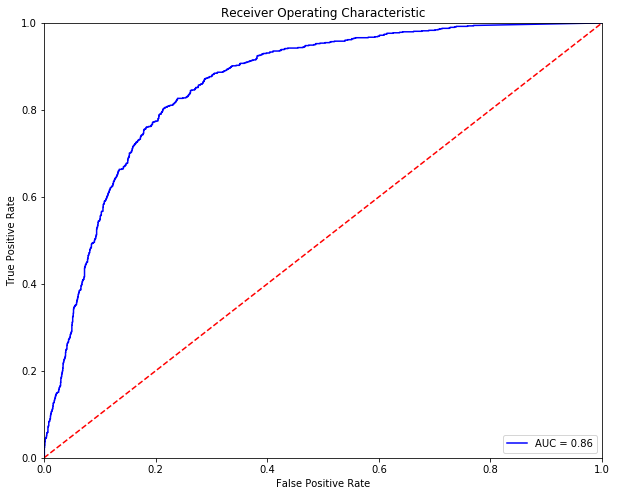

Optimal Threshold is 0.294500667102599
Accuracy on test data is: 0.790721649484536


Predicted  False  True  __all__
Actual                         
False       1604   424     2028
True         185   697      882
__all__     1789  1121     2910



Logistic Regression
Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.3,False,False,0.5,100,multinomial,l2,sag,0.001


Accuracy of the  Logistic  model for the training data is: 0.8114874815905744

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3924   838     4762
True         442  1586     2028
__all__     4366  2424     6790

Accuracy of the  Logistic  model for test data is: 0.802405498281787

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1657   371     2028
True         204   678      882
__all__     1861  1049     2910

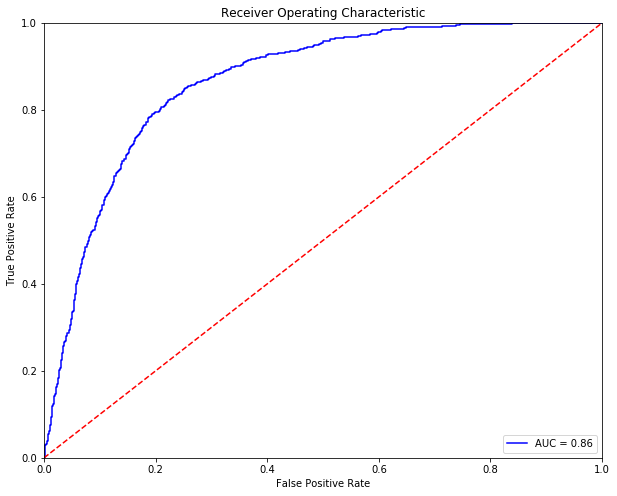

Optimal Threshold is 0.4686855368656265
Accuracy on test data is: 0.7955326460481099


Predicted  False  True  __all__
Actual                         
False       1614   414     2028
True         181   701      882
__all__     1795  1115     2910



RandomForest Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7,8,9,10,11
index,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,oob_score,random_state,verbose
0,gini,10,auto,10,0.1,10,10,0.1,200,False,0,0


Accuracy of the  Random Forest Trees  model for the training data is: 0.7013254786450662

Confusion Matrix for Training data is:


Predicted     0  1  __all__
Actual                     
0          4762  0     4762
1          2028  0     2028
__all__    6790  0     6790

Accuracy of the  Random Forest Trees  model for test data is: 0.6969072164948453

Confusion Matrix for test data is:


Predicted     0  1  __all__
Actual                     
0          2028  0     2028
1           882  0      882
__all__    2910  0     2910

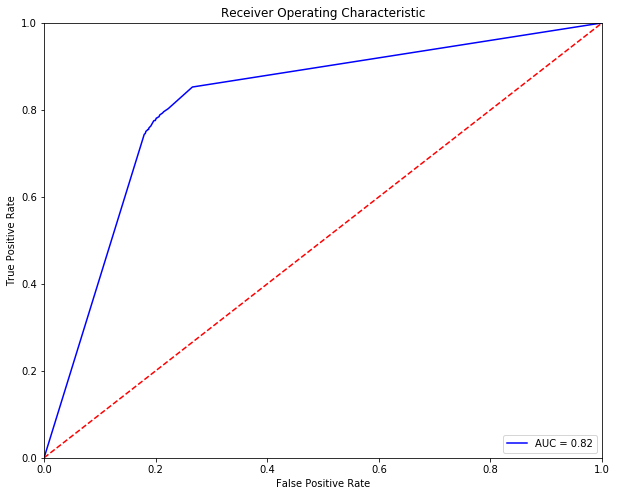

Optimal Threshold is 0.2704336338269238
Accuracy on test data is: 0.7914089347079037


Predicted  False  True  __all__
Actual                         
False       1608   420     2028
True         187   695      882
__all__     1795  1115     2910

4762
0
0
4762
2028
0
0
2028
1.0
0.0
0.0
1.0
2028
0
0
2028
882
0
0
882
1.0
0.0
0.0
1.0


Adaoost Classifier
Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME.R,0.5,50,0


Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8160530191458026

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4066   696     4762
True         553  1475     2028
__all__     4619  2171     6790

Accuracy of the  AdaBoostClassifier  model for test data is: 0.7982817869415808

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1712   316     2028
True         271   611      882
__all__     1983   927     2910

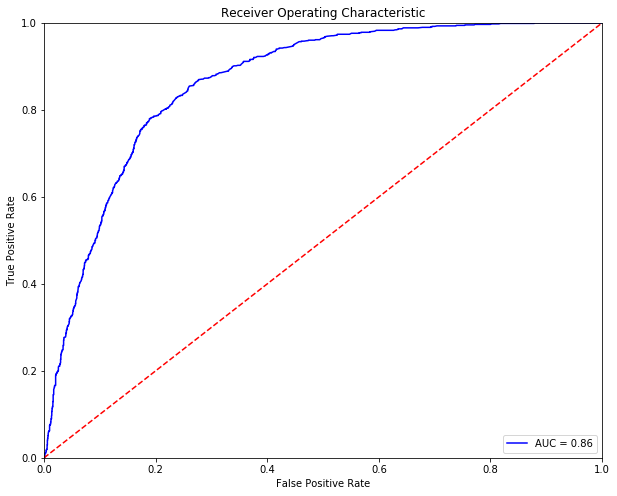

Optimal Threshold is 0.49258394239839076
Accuracy on test data is: 0.7914089347079037


Predicted  False  True  __all__
Actual                         
False       1605   423     2028
True         184   698      882
__all__     1789  1121     2910



GradientBoosting Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state,subsample
0,mse,0.03,exponential,20,0.2,100,0,0.7


Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8201767304860088

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4106   656     4762
True         565  1463     2028
__all__     4671  2119     6790

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8048109965635739

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1730   298     2028
True         270   612      882
__all__     2000   910     2910

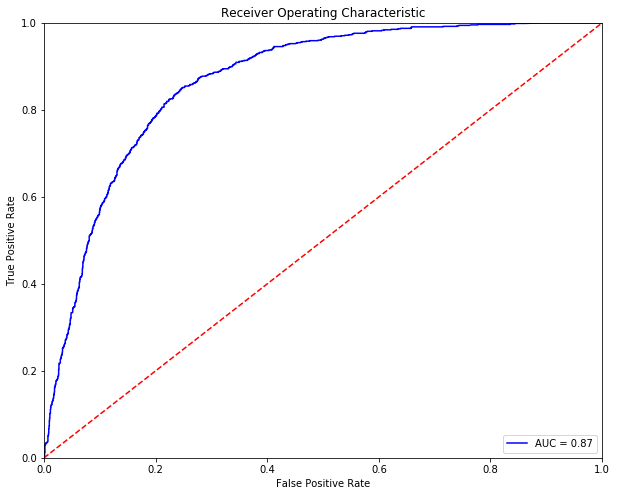

Optimal Threshold is 0.33535984656050233
Accuracy on test data is: 0.7945017182130584


Predicted  False  True  __all__
Actual                         
False       1612   416     2028
True         182   700      882
__all__     1794  1116     2910



ExtraTree Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,gini,10,auto,0.001,2,2,0,best


Accuracy of the  Extra Decision Tree  model for the training data is: 0.803240058910162

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3865   897     4762
True         439  1589     2028
__all__     4304  2486     6790

Accuracy of the  Extra Decision Tree  model for test data is: 0.7910652920962199

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1625   403     2028
True         205   677      882
__all__     1830  1080     2910

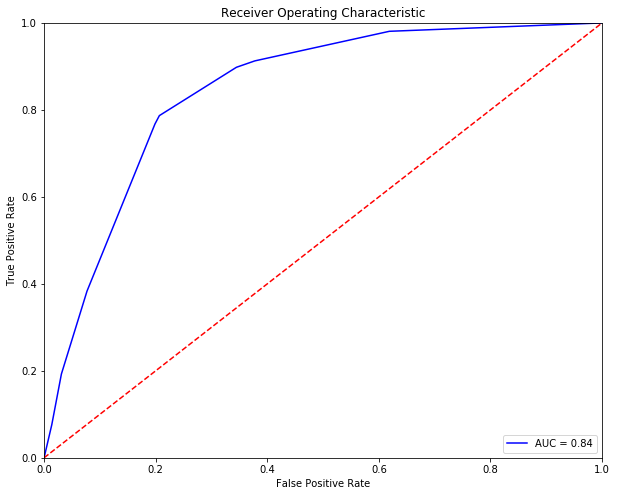

Optimal Threshold is 0.4523809523809524
Accuracy on test data is: 0.7910652920962199


Predicted  False  True  __all__
Actual                         
False       1625   403     2028
True         205   677      882
__all__     1830  1080     2910



Bagging Classifier
Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.6,0.3,300,True,0


Accuracy of the  Bagging  model for the training data is: 0.9338733431516937

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4620   142     4762
True         307  1721     2028
__all__     4927  1863     6790

Accuracy of the  Bagging  model for test data is: 0.8061855670103093

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1752   276     2028
True         288   594      882
__all__     2040   870     2910

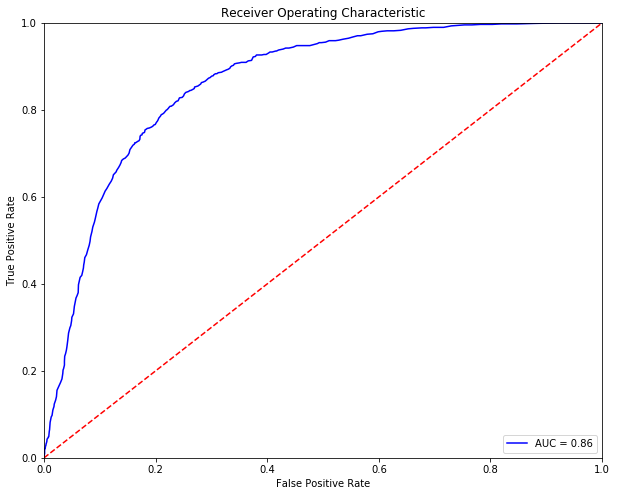

Optimal Threshold is 0.38666666666666666
Accuracy on test data is: 0.7896907216494845


Predicted  False  True  __all__
Actual                         
False       1605   423     2028
True         189   693      882
__all__     1794  1116     2910



Neural Network-1
The accuracy of the model on training data is: 0.8840942562416482


Predicted  False  True  __all__
Actual                         
False       4473   289     4762
True         498  1530     2028
__all__     4971  1819     6790

The accuracy of the model on test data is: 0.7790378006872852


Predicted  False  True  __all__
Actual                         
False       1770   258     2028
True         385   497      882
__all__     2155   755     2910

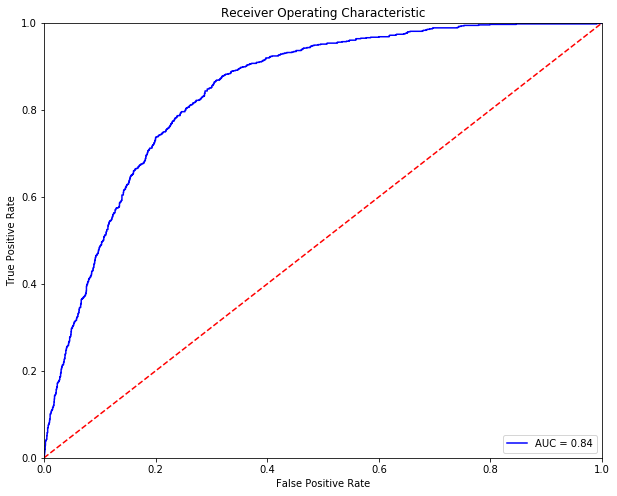

Optimal Threshold is 0.25663134
Accuracy of Logistic Model on training data is: 0.770446735395189


Predicted  False  True  __all__
Actual                         
False       1563   465     2028
True         203   679      882
__all__     1766  1144     2910



Neural Network-2
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.1min finished


The accuracy of the model on training data is: 0.8134020618556701


Predicted  False  True  __all__
Actual                         
False       3944   818     4762
True         449  1579     2028
__all__     4393  2397     6790

The accuracy of the model on test data is: 0.8051546391752578


Predicted  False  True  __all__
Actual                         
False       1670   358     2028
True         209   673      882
__all__     1879  1031     2910

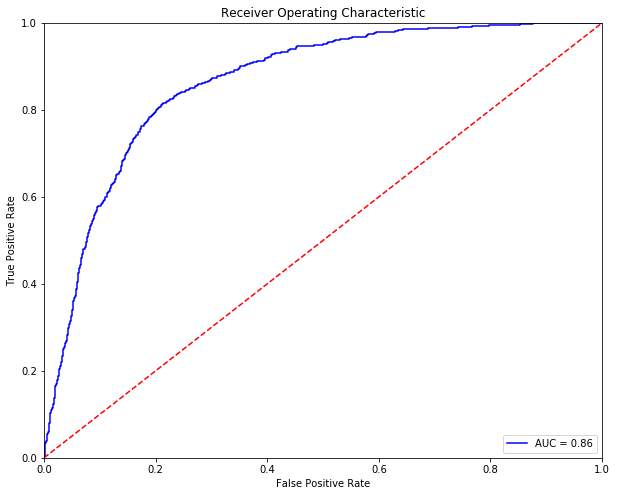

Optimal Threshold is 0.41396606
Accuracy on test data is: 0.7993127147766323


Predicted  False  True  __all__
Actual                         
False       1622   406     2028
True         178   704      882
__all__     1800  1110     2910

In [32]:
feat_imp_10=[None]*4
j=0
for i in range(0,9):
    if i>=2 and i<=5:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,feat_imp_10[j]=f[i](X_train,Y_train,X_test,Y_test)
        j=j+1
    else:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc=f[i](X_train,Y_train,X_test,Y_test)
    table_70_50_10_train.loc[i]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
    table_70_50_10_test.loc[i] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
    table_70_50_10_test_roc.loc[i]=([accuracy, cm.TP,  cm.TN,   cm.FP, cm.FN,  cm.FPR, cm.FNR, threshold,roc_auc])
    print("\n")

In [33]:
table_70_50_10_train['index']=ind_columns
table_70_50_10_test['index']=ind_columns
table_70_50_10_test_roc['index']=ind_columns

table_70_50_10_test.set_index(['index'],drop=True,inplace=True)
table_70_50_10_train.set_index(['index'],drop=True,inplace=True)
table_70_50_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_10_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_10_test_roc)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,1.000000,2028.000000,4762.000000,0.000000,0.000000,0.000000,0.000000
LogisticRegression,0.811487,1586.000000,3924.000000,838.000000,442.000000,0.175976,0.217949
RandomForestClassifier,0.701325,3339.711929,1422.288071,1422.288071,605.711929,0.701325,0.298675
AdaBoostClassifier,0.816053,1475.000000,4066.000000,696.000000,553.000000,0.146157,0.272682
GradientBoostingClassifier,0.820177,1463.000000,4106.000000,656.000000,565.000000,0.137757,0.278600
ExtraTreeClassifier,0.803240,1589.000000,3865.000000,897.000000,439.000000,0.188366,0.216469
BaggingClassifier,0.933873,1721.000000,4620.000000,142.000000,307.000000,0.029819,0.151381
Neural Network-1,0.884094,1530.000000,4473.000000,289.000000,498.000000,0.060689,0.245562
Neural-Network-2,0.813402,1579.000000,3944.000000,818.000000,449.000000,0.171777,0.221400


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.800344,532.000000,1797.000000,231.000000,350.000000,0.113905,0.396825
LogisticRegression,0.802405,678.000000,1657.000000,371.000000,204.000000,0.182939,0.231293
RandomForestClassifier,0.696907,1413.327835,614.672165,614.672165,267.327835,0.696907,0.303093
AdaBoostClassifier,0.798282,611.000000,1712.000000,316.000000,271.000000,0.155819,0.307256
GradientBoostingClassifier,0.804811,612.000000,1730.000000,298.000000,270.000000,0.146943,0.306122
ExtraTreeClassifier,0.791065,677.000000,1625.000000,403.000000,205.000000,0.198718,0.232426
BaggingClassifier,0.806186,594.000000,1752.000000,276.000000,288.000000,0.136095,0.326531
Neural Network-1,0.779038,497.000000,1770.000000,258.000000,385.000000,0.127219,0.436508
Neural-Network-2,0.805155,673.000000,1670.000000,358.000000,209.000000,0.176529,0.236961


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,TP,TN,FP,FN,FPR,FNR,threshold,auc
index,,,,,,,,,
KNeighborsClassifier,0.790722,697.0,1604.0,424.0,185.0,0.209073,0.209751,0.294501,0.858741
LogisticRegression,0.795533,701.0,1614.0,414.0,181.0,0.204142,0.205215,0.468686,0.864654
RandomForestClassifier,0.791409,695.0,1608.0,420.0,187.0,0.207101,0.212018,0.270434,0.816111
AdaBoostClassifier,0.791409,698.0,1605.0,423.0,184.0,0.208580,0.208617,0.492584,0.863878
GradientBoostingClassifier,0.794502,700.0,1612.0,416.0,182.0,0.205128,0.206349,0.335360,0.867301
ExtraTreeClassifier,0.791065,677.0,1625.0,403.0,205.0,0.198718,0.232426,0.452381,0.844245
BaggingClassifier,0.789691,693.0,1605.0,423.0,189.0,0.208580,0.214286,0.386667,0.862718
Neural Network-1,0.770447,679.0,1563.0,465.0,203.0,0.229290,0.230159,0.256631,0.844162
Neural-Network-2,0.799313,704.0,1622.0,406.0,178.0,0.200197,0.201814,0.413966,0.863610


#### Random State 20

In [34]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_20.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))
Y=Y.values

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)


## Table to store training and test measures
table_70_50_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,BYR,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5f5a2b60a4480e331c,85,2,2,1,5,86,2.523256,1.813953,30.546512,157.523256,2244.197674,6,38,1,5,0,8,1,0,6,2,2,0,1,5,6,1,0,1,0,0,0,0,0,3
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e107c9b0e15a44099a,358,6,13,8,133,363,22.209366,12.785124,63.633609,2778.881543,24241.719008,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,161,93,61,44,0,0


1 -> Infected
0 -> Uninfected


User
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5f5a2b60a4480e331c    0
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e107c9b0e15a44099a    0
4ba926e44bbc5718a83b0a3d37d4b38344b8413313a380c59079fb0ac246f6d8    1
f27f0a15e884be036824b69b19111caa9597b97f2bbd91941e15671027811583    0
d80a556c9a21d199c8e0b539e665a577a1c38c2a1d6172c68c634889aa7a1c6e    1
Name: Target, dtype: int64

Variance explained using 13 components is: 0.9384105861303276
The train/test split ratio is 70:30


K-Nearest Neighbors
Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,euclidean,50,distance


Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4760     0     4760
True           0  2030     2030
__all__     4760  2030     6790

Accuracy of the  KNN  model for test data is: 0.7951890034364261

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1825   205     2030
True         391   489      880
__all__     2216   694     2910

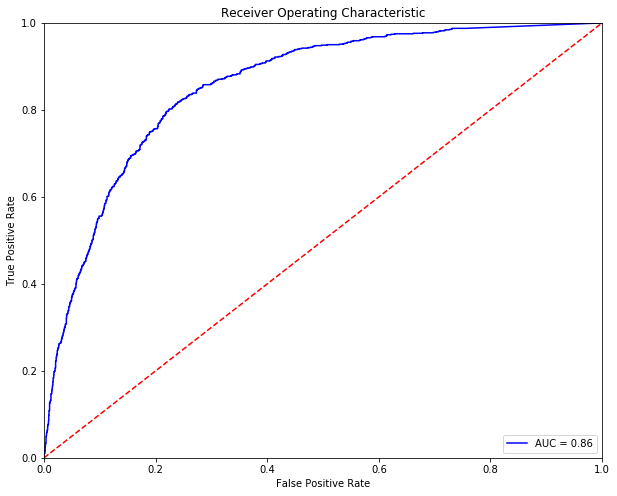

Optimal Threshold is 0.30042116430484006
Accuracy on test data is: 0.7859106529209622


Predicted  False  True  __all__
Actual                         
False       1596   434     2030
True         189   691      880
__all__     1785  1125     2910



Logistic Regression
Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.3,False,False,0.5,100,ovr,l2,sag,1e-05


Accuracy of the  Logistic  model for the training data is: 0.8010309278350516

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3868   892     4760
True         459  1571     2030
__all__     4327  2463     6790

Accuracy of the  Logistic  model for test data is: 0.7989690721649485

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1665   365     2030
True         220   660      880
__all__     1885  1025     2910

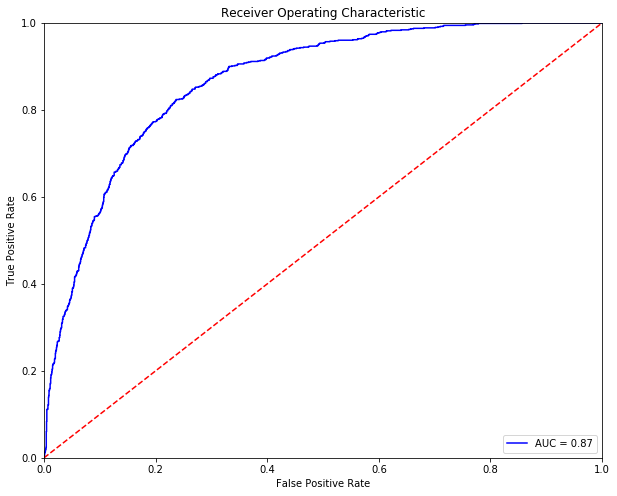

Optimal Threshold is 0.4319197718211874
Accuracy on test data is: 0.7876288659793814


Predicted  False  True  __all__
Actual                         
False       1599   431     2030
True         187   693      880
__all__     1786  1124     2910



RandomForest Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7,8,9,10,11
index,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,oob_score,random_state,verbose
0,gini,10,auto,10,0.1,10,10,0.1,200,False,0,0


Accuracy of the  Random Forest Trees  model for the training data is: 0.7010309278350515

Confusion Matrix for Training data is:


Predicted     0  1  __all__
Actual                     
0          4760  0     4760
1          2030  0     2030
__all__    6790  0     6790

Accuracy of the  Random Forest Trees  model for test data is: 0.697594501718213

Confusion Matrix for test data is:


Predicted     0  1  __all__
Actual                     
0          2030  0     2030
1           880  0      880
__all__    2910  0     2910

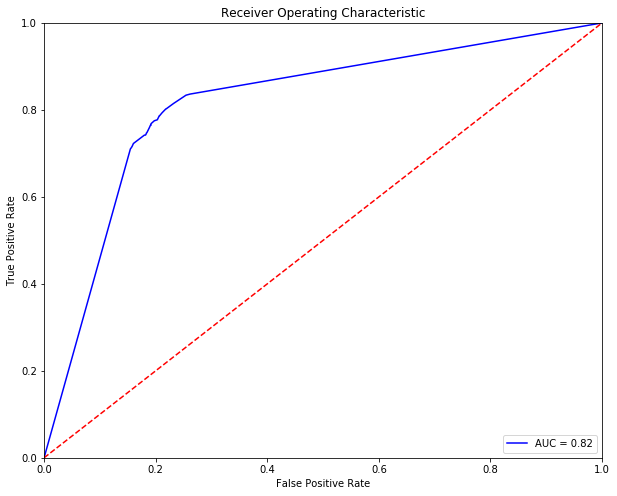

Optimal Threshold is 0.27603918973014585
Accuracy on test data is: 0.7910652920962199


Predicted  False  True  __all__
Actual                         
False       1610   420     2030
True         188   692      880
__all__     1798  1112     2910

4760
0
0
4760
2030
0
0
2030
1.0
0.0
0.0
1.0
2030
0
0
2030
880
0
0
880
1.0
0.0
0.0
1.0


Adaoost Classifier
Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME.R,0.5,50,0


Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8120765832106038

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4106   654     4760
True         622  1408     2030
__all__     4728  2062     6790

Accuracy of the  AdaBoostClassifier  model for test data is: 0.7982817869415808

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1744   286     2030
True         301   579      880
__all__     2045   865     2910

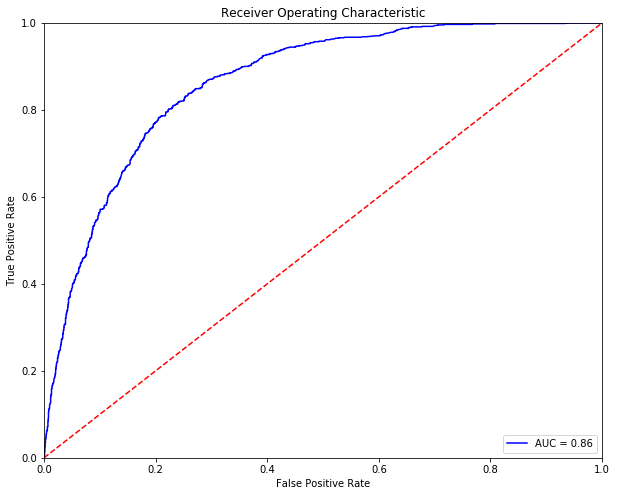

Optimal Threshold is 0.4917846954731791
Accuracy on test data is: 0.7855670103092783


Predicted  False  True  __all__
Actual                         
False       1594   436     2030
True         188   692      880
__all__     1782  1128     2910



GradientBoosting Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state,subsample
0,mse,0.2,exponential,10,0.3,50,0,0.7


Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8164948453608247

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4135   625     4760
True         621  1409     2030
__all__     4756  2034     6790

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.802405498281787

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1755   275     2030
True         300   580      880
__all__     2055   855     2910

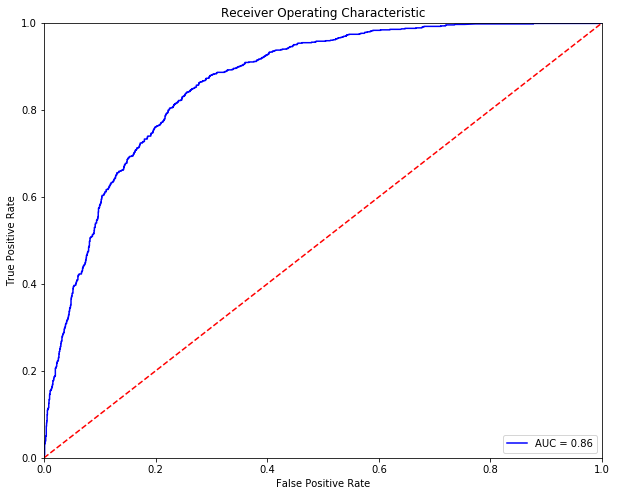

Optimal Threshold is 0.3258018042202847
Accuracy on test data is: 0.7835051546391752


Predicted  False  True  __all__
Actual                         
False       1590   440     2030
True         190   690      880
__all__     1780  1130     2910



ExtraTree Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,entropy,10,auto,0.001,3,2,0,best


Accuracy of the  Extra Decision Tree  model for the training data is: 0.793519882179676

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3924   836     4760
True         566  1464     2030
__all__     4490  2300     6790

Accuracy of the  Extra Decision Tree  model for test data is: 0.7707903780068729

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1649   381     2030
True         286   594      880
__all__     1935   975     2910

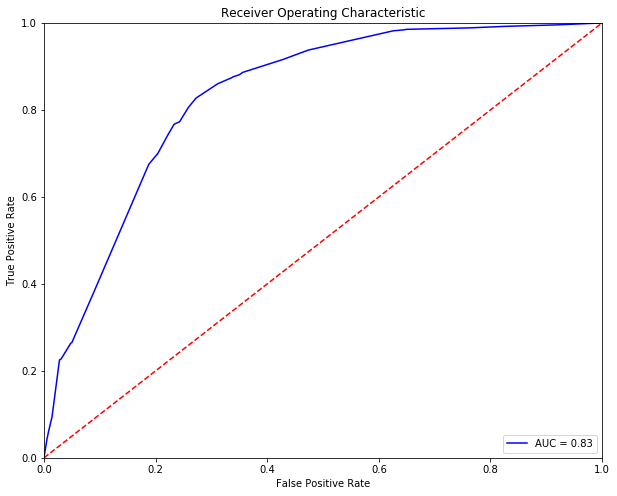

Optimal Threshold is 0.4105960264900662
Accuracy on test data is: 0.7673539518900344


Predicted  False  True  __all__
Actual                         
False       1582   448     2030
True         229   651      880
__all__     1811  1099     2910



Bagging Classifier
Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.6,0.3,200,True,0


Accuracy of the  Bagging  model for the training data is: 0.9325478645066274

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4615   145     4760
True         313  1717     2030
__all__     4928  1862     6790

Accuracy of the  Bagging  model for test data is: 0.7965635738831615

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1771   259     2030
True         333   547      880
__all__     2104   806     2910

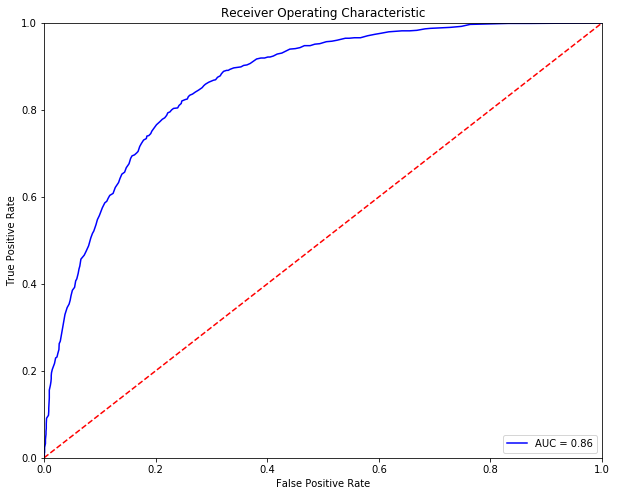

Optimal Threshold is 0.385
Accuracy on test data is: 0.7852233676975945


Predicted  False  True  __all__
Actual                         
False       1600   430     2030
True         195   685      880
__all__     1795  1115     2910



Neural Network-1
The accuracy of the model on training data is: 0.8664212076407645


Predicted  False  True  __all__
Actual                         
False       4311   449     4760
True         458  1572     2030
__all__     4769  2021     6790

The accuracy of the model on test data is: 0.7821305841924399


Predicted  False  True  __all__
Actual                         
False       1705   325     2030
True         309   571      880
__all__     2014   896     2910

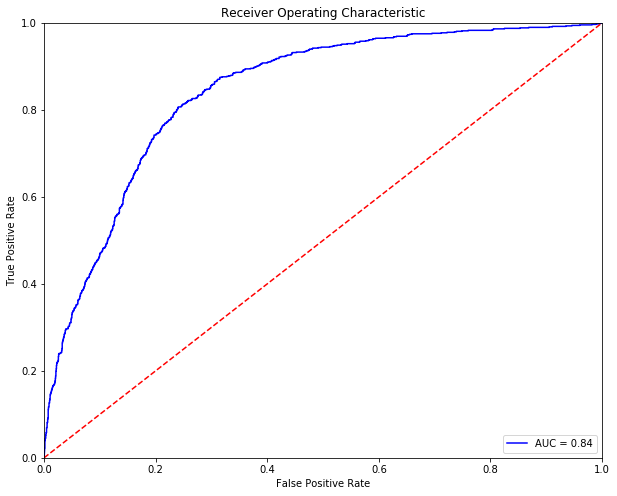

Optimal Threshold is 0.35591826
Accuracy of Logistic Model on training data is: 0.7762886597938145


Predicted  False  True  __all__
Actual                         
False       1576   454     2030
True         197   683      880
__all__     1773  1137     2910



Neural Network-2
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.4min finished


The accuracy of the model on training data is: 0.8053019145802651


Predicted  False  True  __all__
Actual                         
False       4094   666     4760
True         656  1374     2030
__all__     4750  2040     6790

The accuracy of the model on test data is: 0.8010309278350516


Predicted  False  True  __all__
Actual                         
False       1758   272     2030
True         307   573      880
__all__     2065   845     2910

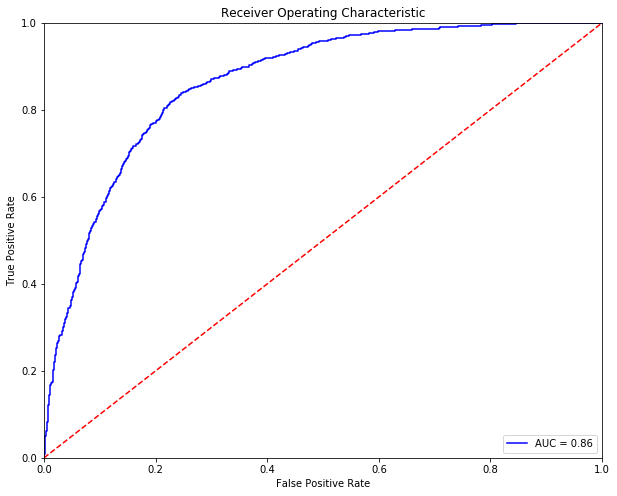

Optimal Threshold is 0.12368086
Accuracy on test data is: 0.7890034364261168


Predicted  False  True  __all__
Actual                         
False       1602   428     2030
True         186   694      880
__all__     1788  1122     2910

In [35]:
feat_imp_20=[None]*4
j=0
for i in range(0,9):
    if i>=2 and i<=5:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,feat_imp_20[j]=f[i](X_train,Y_train,X_test,Y_test)
        j=j+1
    else:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc=f[i](X_train,Y_train,X_test,Y_test)
    table_70_50_20_train.loc[i]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
    table_70_50_20_test.loc[i] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
    table_70_50_20_test_roc.loc[i]=([accuracy, cm.TP,  cm.TN,   cm.FP, cm.FN,  cm.FPR, cm.FNR, threshold,roc_auc])
    print("\n")

In [36]:
table_70_50_20_train['index']=ind_columns
table_70_50_20_test['index']=ind_columns
table_70_50_20_test_roc['index']=ind_columns

table_70_50_20_test.set_index(['index'],drop=True,inplace=True)
table_70_50_20_train.set_index(['index'],drop=True,inplace=True)
table_70_50_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_20_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_20_test_roc)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,1.000000,2030.000000,4760.000000,0.000000,0.000000,0.000000,0.000000
LogisticRegression,0.801031,1571.000000,3868.000000,892.000000,459.000000,0.187395,0.226108
RandomForestClassifier,0.701031,3336.907216,1423.092784,1423.092784,606.907216,0.701031,0.298969
AdaBoostClassifier,0.812077,1408.000000,4106.000000,654.000000,622.000000,0.137395,0.306404
GradientBoostingClassifier,0.816495,1409.000000,4135.000000,625.000000,621.000000,0.131303,0.305911
ExtraTreeClassifier,0.793520,1464.000000,3924.000000,836.000000,566.000000,0.175630,0.278818
BaggingClassifier,0.932548,1717.000000,4615.000000,145.000000,313.000000,0.030462,0.154187
Neural Network-1,0.866421,1572.000000,4311.000000,449.000000,458.000000,0.094328,0.225616
Neural-Network-2,0.805302,1374.000000,4094.000000,666.000000,656.000000,0.139916,0.323153


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.795189,489.000000,1825.000000,205.000000,391.000000,0.100985,0.444318
LogisticRegression,0.798969,660.000000,1665.000000,365.000000,220.000000,0.179803,0.250000
RandomForestClassifier,0.697595,1416.116838,613.883162,613.883162,266.116838,0.697595,0.302405
AdaBoostClassifier,0.798282,579.000000,1744.000000,286.000000,301.000000,0.140887,0.342045
GradientBoostingClassifier,0.802405,580.000000,1755.000000,275.000000,300.000000,0.135468,0.340909
ExtraTreeClassifier,0.770790,594.000000,1649.000000,381.000000,286.000000,0.187685,0.325000
BaggingClassifier,0.796564,547.000000,1771.000000,259.000000,333.000000,0.127586,0.378409
Neural Network-1,0.782131,571.000000,1705.000000,325.000000,309.000000,0.160099,0.351136
Neural-Network-2,0.801031,573.000000,1758.000000,272.000000,307.000000,0.133990,0.348864


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,TP,TN,FP,FN,FPR,FNR,threshold,auc
index,,,,,,,,,
KNeighborsClassifier,0.785911,691.0,1596.0,434.0,189.0,0.213793,0.214773,0.300421,0.856247
LogisticRegression,0.787629,693.0,1599.0,431.0,187.0,0.212315,0.212500,0.431920,0.866725
RandomForestClassifier,0.791065,692.0,1610.0,420.0,188.0,0.206897,0.213636,0.276039,0.816581
AdaBoostClassifier,0.785567,692.0,1594.0,436.0,188.0,0.214778,0.213636,0.491785,0.863371
GradientBoostingClassifier,0.783505,690.0,1590.0,440.0,190.0,0.216749,0.215909,0.325802,0.864903
ExtraTreeClassifier,0.767354,651.0,1582.0,448.0,229.0,0.220690,0.260227,0.410596,0.832805
BaggingClassifier,0.785223,685.0,1600.0,430.0,195.0,0.211823,0.221591,0.385000,0.862020
Neural Network-1,0.776289,683.0,1576.0,454.0,197.0,0.223645,0.223864,0.355918,0.842343
Neural-Network-2,0.789003,694.0,1602.0,428.0,186.0,0.210837,0.211364,0.123681,0.864651


In [37]:
table_70_50_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_50_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_50_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

table_70_50_train_avg['accuracy']=(table_70_50_train['accuracy']+table_70_50_10_train['accuracy']+table_70_50_20_train['accuracy'])/3.0
table_70_50_train_avg['FPR']=(table_70_50_train['FPR']+table_70_50_10_train['FPR']+table_70_50_20_train['FPR'])/3.0
table_70_50_train_avg['FNR']=(table_70_50_train['FNR']+table_70_50_10_train['FNR']+table_70_50_20_train['FNR'])/3.0

table_70_50_test_avg['accuracy']=(table_70_50_test['accuracy']+table_70_50_10_test['accuracy']+table_70_50_20_test['accuracy'])/3.0
table_70_50_test_avg['FPR']=(table_70_50_test['FPR']+table_70_50_10_test['FPR']+table_70_50_20_test['FPR'])/3.0
table_70_50_test_avg['FNR']=(table_70_50_test['FNR']+table_70_50_10_test['FNR']+table_70_50_20_test['FNR'])/3.0

table_70_50_test_roc_avg['accuracy']=(table_70_50_test_roc['accuracy']+table_70_50_10_test_roc['accuracy']+table_70_50_20_test_roc['accuracy'])/3.0
table_70_50_test_roc_avg['FPR']=(table_70_50_test_roc['FPR']+table_70_50_10_test_roc['FPR']+table_70_50_20_test_roc['FPR'])/3.0
table_70_50_test_roc_avg['FNR']=(table_70_50_test_roc['FNR']+table_70_50_10_test_roc['FNR']+table_70_50_20_test_roc['FNR'])/3.0
table_70_50_test_roc_avg['auc']=(table_70_50_test_roc['auc']+table_70_50_10_test_roc['auc']+table_70_50_20_test_roc['auc'])/3.0


print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_70_50_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_70_50_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_test_roc_avg)


feat_imp_80_50=list(map(sum, zip(feat_imp,feat_imp_10,feat_imp_20)))
print("Average feature imortance for the 3 random sets:")
feat_impt_plot(sum(feat_imp_80_50)/12)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


,accuracy,FPR,FNR
index,,,
KNeighborsClassifier,0.936868,0.032977,0.134390
LogisticRegression,0.804762,0.179812,0.231559
RandomForestClassifier,0.701669,0.701669,0.298331
AdaBoostClassifier,0.813255,0.139791,0.297206
GradientBoostingClassifier,0.815857,0.136357,0.296537
ExtraTreeClassifier,0.799902,0.181138,0.244673
BaggingClassifier,0.942955,0.022889,0.137352
Neural Network-1,0.870103,0.081994,0.242580
Neural-Network-2,0.808738,0.155459,0.275459


Comparision Table for Test Accuracies:


,accuracy,FPR,FNR
index,,,
KNeighborsClassifier,0.799542,0.103164,0.423292
LogisticRegression,0.806415,0.176057,0.233757
RandomForestClassifier,0.696105,0.696105,0.303895
AdaBoostClassifier,0.805842,0.141827,0.314077
GradientBoostingClassifier,0.807331,0.140530,0.312198
ExtraTreeClassifier,0.791867,0.186420,0.258012
BaggingClassifier,0.804582,0.131810,0.341228
Neural Network-1,0.782818,0.143651,0.385631
Neural-Network-2,0.809049,0.151715,0.280947


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,FPR,FNR,auc
index,,,,
KNeighborsClassifier,0.792669,0.205509,0.211467,0.862315
LogisticRegression,0.797480,0.202382,0.202837,0.870874
RandomForestClassifier,0.797365,0.198755,0.211470,0.822342
AdaBoostClassifier,0.795762,0.204187,0.204350,0.868593
GradientBoostingClassifier,0.797136,0.202703,0.203229,0.871371
ExtraTreeClassifier,0.790722,0.197422,0.236421,0.844514
BaggingClassifier,0.792325,0.205513,0.212632,0.866324
Neural Network-1,0.776518,0.223126,0.224293,0.846651
Neural-Network-2,0.799885,0.199749,0.200951,0.869581


Average feature imortance for the 3 random sets:


In [2]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')